In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from time import time
import matplotlib.pyplot as plt
from figure_manager import FigureManager
from plots import *

import DynamicTimeAllocationModel

path = 'output/'

fm = FigureManager(path, use_latex=False)

# c++ settings
do_compile = True
threads = 128

# from EconModel import cpptools
# cpptools.setup_nlopt(folder='cppfuncs/', do_print=True)

# Solve and simulate from alternative models

Benchmark model settings

In [2]:
# settings = { 
#        'T':20,
#        'num_A': 15,
#        'num_A_pd': 16,
#        'num_K': 12,
#        'num_power': 11,
#        'num_love': 6,

#        'simT': 20,
#        'simN': 1000,

#        'num_Ctot': 120,
#        'num_marg_u':120,

#        'phi': 1.0,
#        'phi_mult': 1.0,
       
#        'mu': 0.3,
#        'mu_mult': 1.0,
       
#        'p_meet': 0.3,

#        'threads':threads,
#        'num_multistart': 2,
       
#        'do_egm': False,
#        'interp_method': 'linear',
#        'interp_inverse': False,
       
#        'precompute_intratemporal': True,
#        'centered_gradient': True,
#        }

In [3]:
settings = { 
       'T':10,
       'num_A': 16,
       'num_A_pd': 15,
       'num_K': 17,
       'num_power': 9,
       'num_love': 8,
       'num_types': 5,
       
       'max_A': 1000,
       'max_A_pd': 1000,
       'max_Ctot': 2000,
       'max_K': 50,
       
       'init_couple_share': 0.77,
       
       'simT': 10,
       'simN': 10_000,

       'num_Ctot': 1024,
       'num_marg_u':1024,
       
       'beta': 0.98,
       'R': 1/0.98,
       'rho': 1.5,
       
       
       
       
       'p_meet': 0.0,

       'threads':threads,
       'num_multistart': 2,
       
       'do_egm': True,
       'interp_method': 'linear',
       'interp_inverse': True,
       
       'precompute_intratemporal': True,
       'centered_gradient': True,
       
    'mu': 2.5, 
    'mu_mult': 1.10,
    'gamma': 0.03,
    'gamma_mult': 1.00,
    'gamma2': -0.001,
    # 'mu': 2.44, 
    # 'mu_mult': 1.14,
    # 'gamma': 0.034,
    # 'gamma_mult': 0.83,
    # 'gamma2': -0.0008,
    'gamma2_mult': 1.0,
    
    'sigma_K': 0.05,
    
    'eta'            : 2.85,
    'eta_mult'       : 1.0,
    'phi'            : 1.97,
    'phi_mult'       : 1.0,

    'alpha'          : 1.18,
    'zeta'           : 0.40,
    'omega'          : 0.38,
    'pi'             : 0.46,
    
    'lambda_'        : 12.66,
    
    'phi_k'          : 0.39,
    
    'tax_rate'       : 0.0,
    'available_hours': 1.0,
    'full_time_hours': 0.36,
    
    'sigma_love': 10.30,
    'div_cost': 0.0,
    
    
    
    
    
        'sigma_mu': 0.4, #0.2
        'sigma_mu_mult': 1.0,
}

In [4]:
show_iEGM = False
show_VFI = False
show_numEGM = False
show_iEGMinv = True

In [5]:
if show_iEGM:
    settings_iEGM = settings.copy()
    settings_iEGM['do_egm'] = True
    settings_iEGM['interp_method'] = 'linear'
    settings_iEGM['interp_inverse'] = False
    
    model_iEGM = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_iEGM)
    model_iEGM.link_to_cpp(force_compile=do_compile)

    %time model_iEGM.solve()
    %time model_iEGM.simulate()
    
    model_iEGM.cpp.delink()

In [6]:
if show_VFI:
    settings_VFI = settings.copy()
    settings_VFI['do_egm'] = False
    
    model_VFI = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_VFI)
    model_VFI.link_to_cpp(force_compile=do_compile)
    
    %time model_VFI.solve()
    %time model_VFI.simulate()

    model_VFI.cpp.delink()

In [7]:
if show_numEGM:
    settings_numEGM = settings.copy()
    settings_numEGM['do_egm'] = True
    settings_numEGM['interp_method'] = 'numerical'
    
    model_numEGM = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_numEGM)
    model_numEGM.link_to_cpp(force_compile=do_compile)
    
    %time model_numEGM.solve()
    %time model_numEGM.simulate()
    
    model_numEGM.cpp.delink()

In [8]:
if show_iEGMinv:
    settings_iEGMinv = settings.copy()
    settings_iEGMinv['do_egm'] = True
    settings_iEGMinv['interp_method'] = 'linear'
    settings_iEGMinv['interp_inverse'] = True
    
    model_iEGMinv = DynamicTimeAllocationModel.HouseholdModelClass(par=settings_iEGMinv)
    model_iEGMinv.link_to_cpp(force_compile=do_compile)
    
    %time model_iEGMinv.solve()
    %time model_iEGMinv.simulate()
 
    model_iEGMinv.cpp.delink()

CPU times: total: 1h 21min 17s
Wall time: 58.9 s
CPU times: total: 875 ms
Wall time: 28 ms


Setup plotters

In [9]:
if show_iEGM:    mp_iEGM = model_plotter(model_iEGM, model_name='iEGM', titles=['variable'], labels=['model', 'index'])
if show_VFI:     mp_VFI = model_plotter(model_VFI, model_name='VFI', titles=['variable'], labels=['model', 'index'])
if show_numEGM:  mp_numEGM = model_plotter(model_numEGM, model_name='numEGM', titles=['variable'], labels=['model', 'index'])
if show_iEGMinv: mp_iEGMinv = model_plotter(model_iEGMinv, model_name='iEGMinv', titles=['variable'], labels=['model', 'index'])

save_figures = False
grid = 'grid_A'
idx = {'t': 0, 'il':2, 'type': 2, 'iK': 10, 'iP': 5, 'iL': 3, 'iA': 10, 'iA_pd': 10}
t, type, iK, iP, iL, iA = idx['t'], idx['type'], idx['iK'], idx['iP'], idx['iL'], idx['iA']

## Singles solution

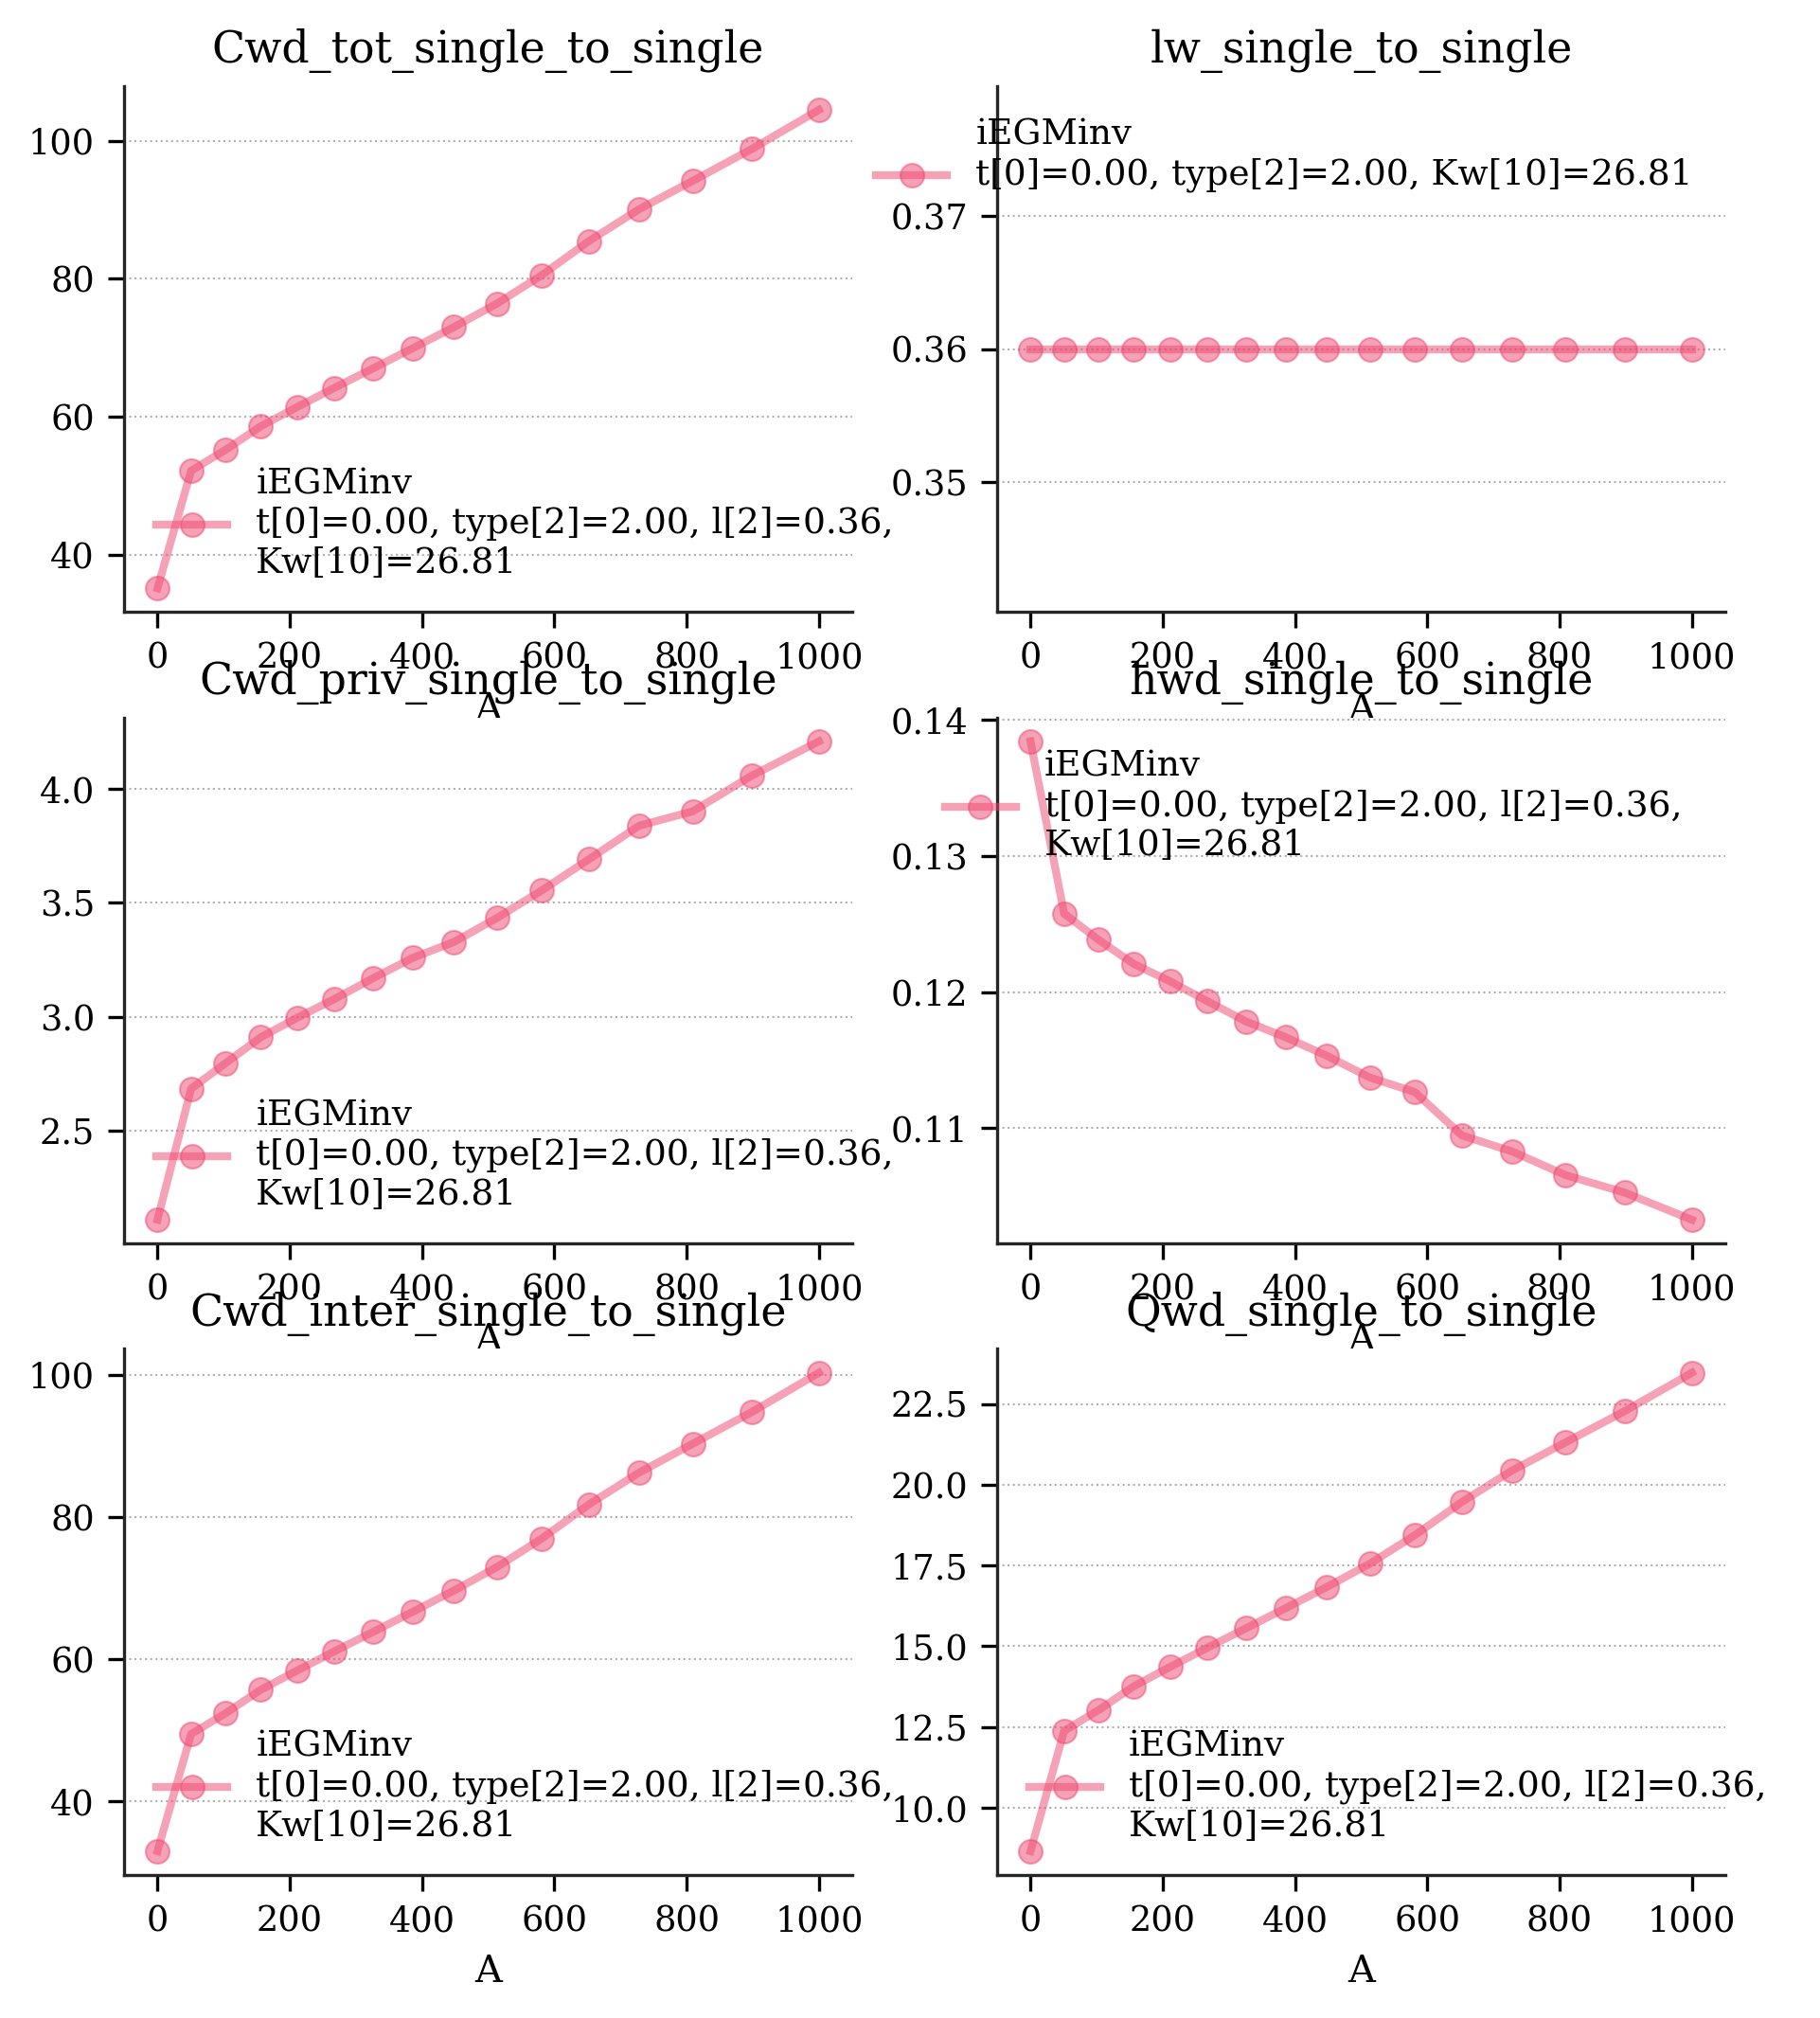

In [10]:
fig, ax = fm.create_figure(3,2,6)
if show_iEGM:    mp_iEGM.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_female_single_choices(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="female_single_choices")

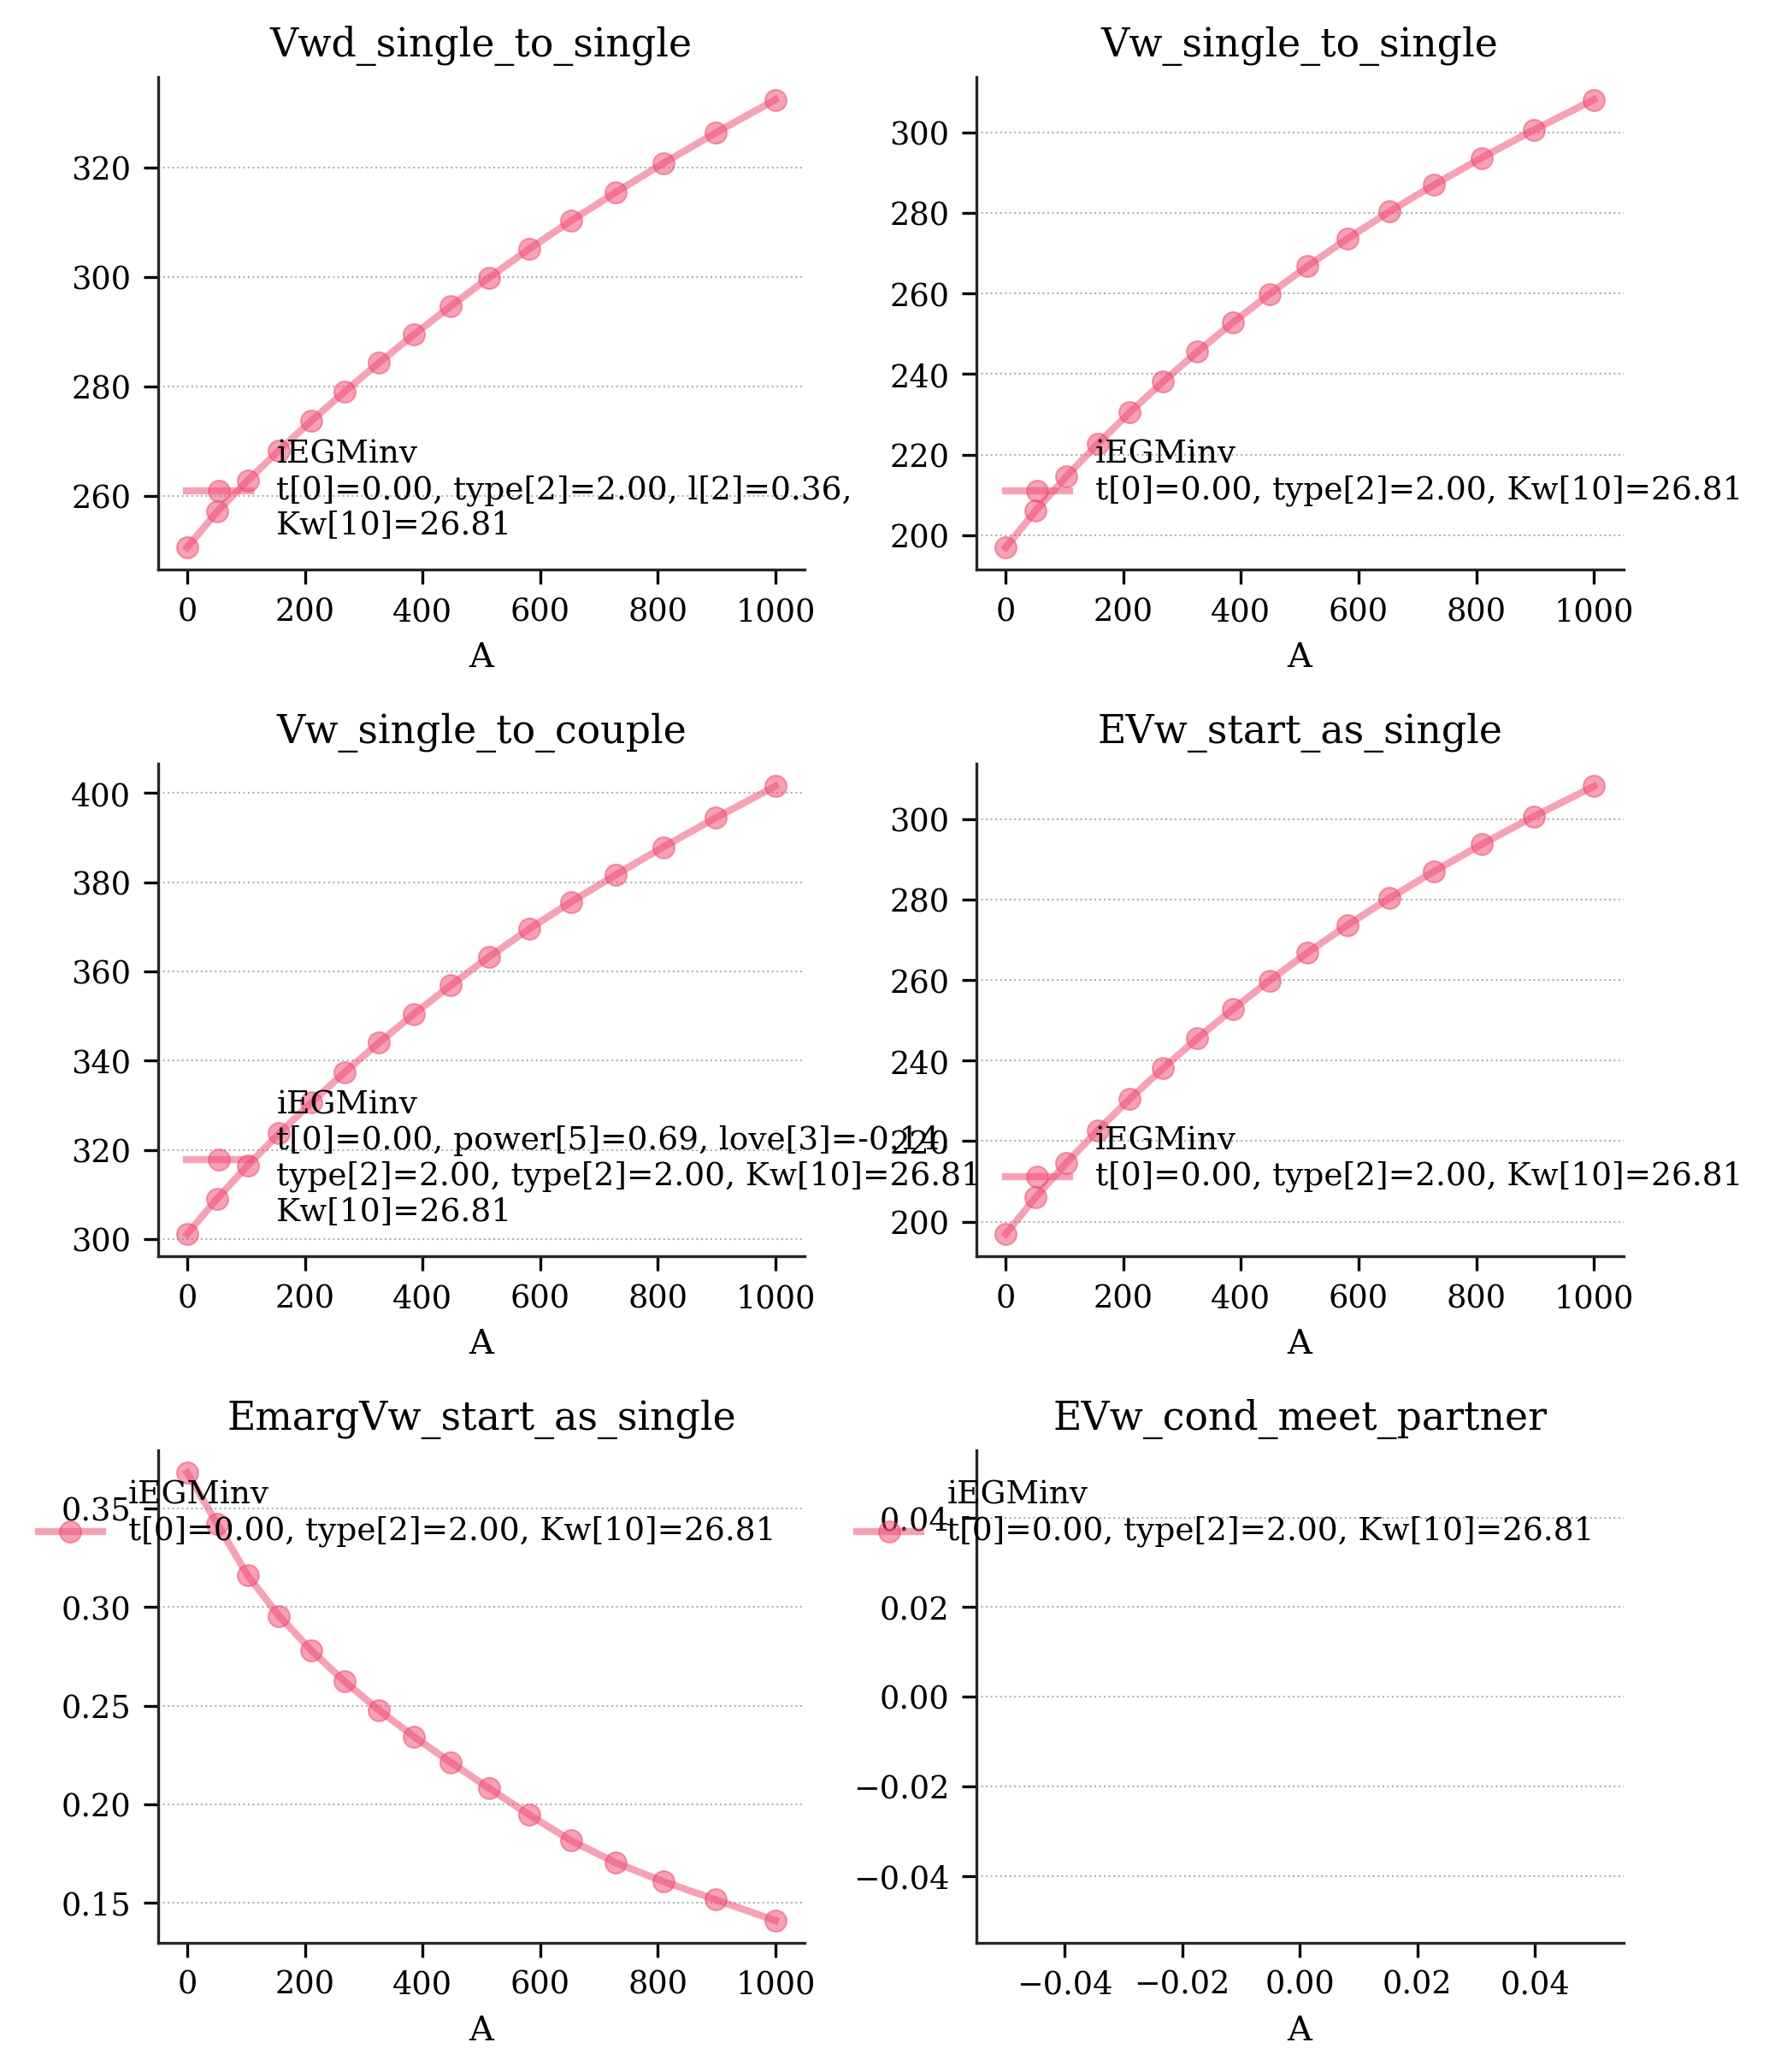

In [11]:
fig, ax = fm.create_figure(3,2,6)
if show_iEGM:    mp_iEGM.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_female_single_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="female_single_values")
else: fig.tight_layout()

## Couples solution

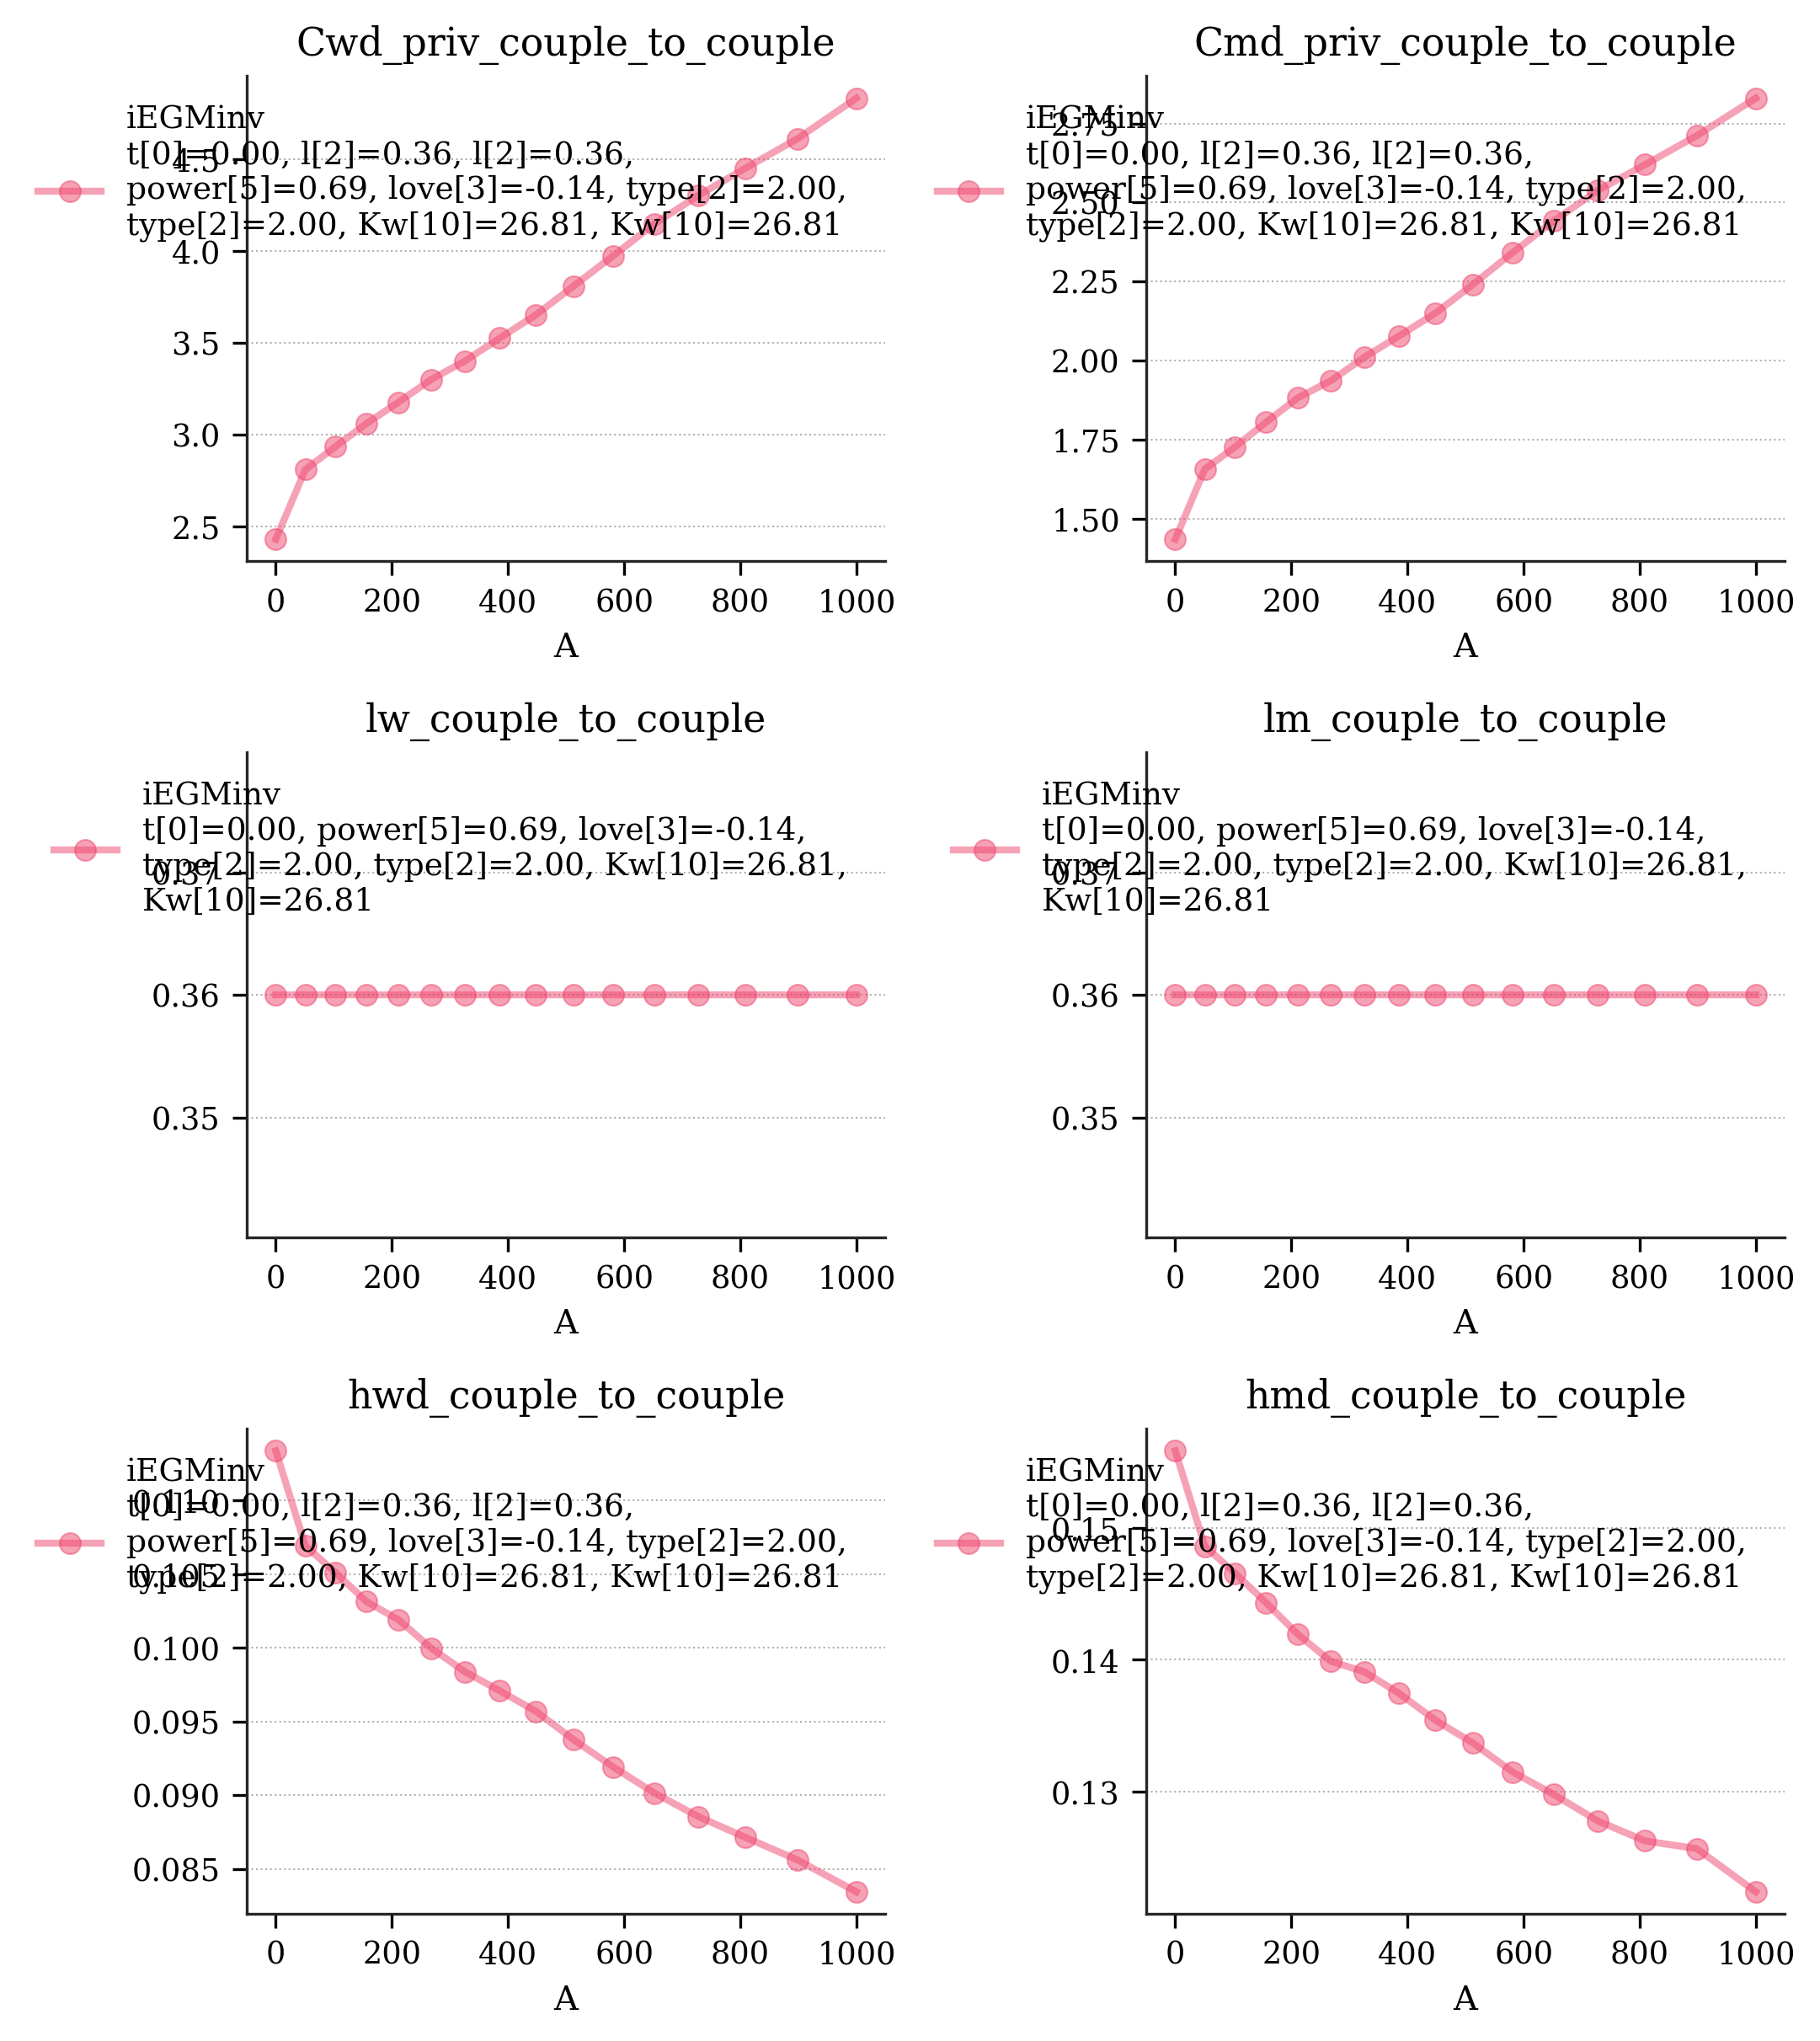

In [12]:
fig, ax = fm.create_figure(3,2,6)
if show_iEGM:    mp_iEGM.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_gender_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="gender_couple_choices")
else: fig.tight_layout()

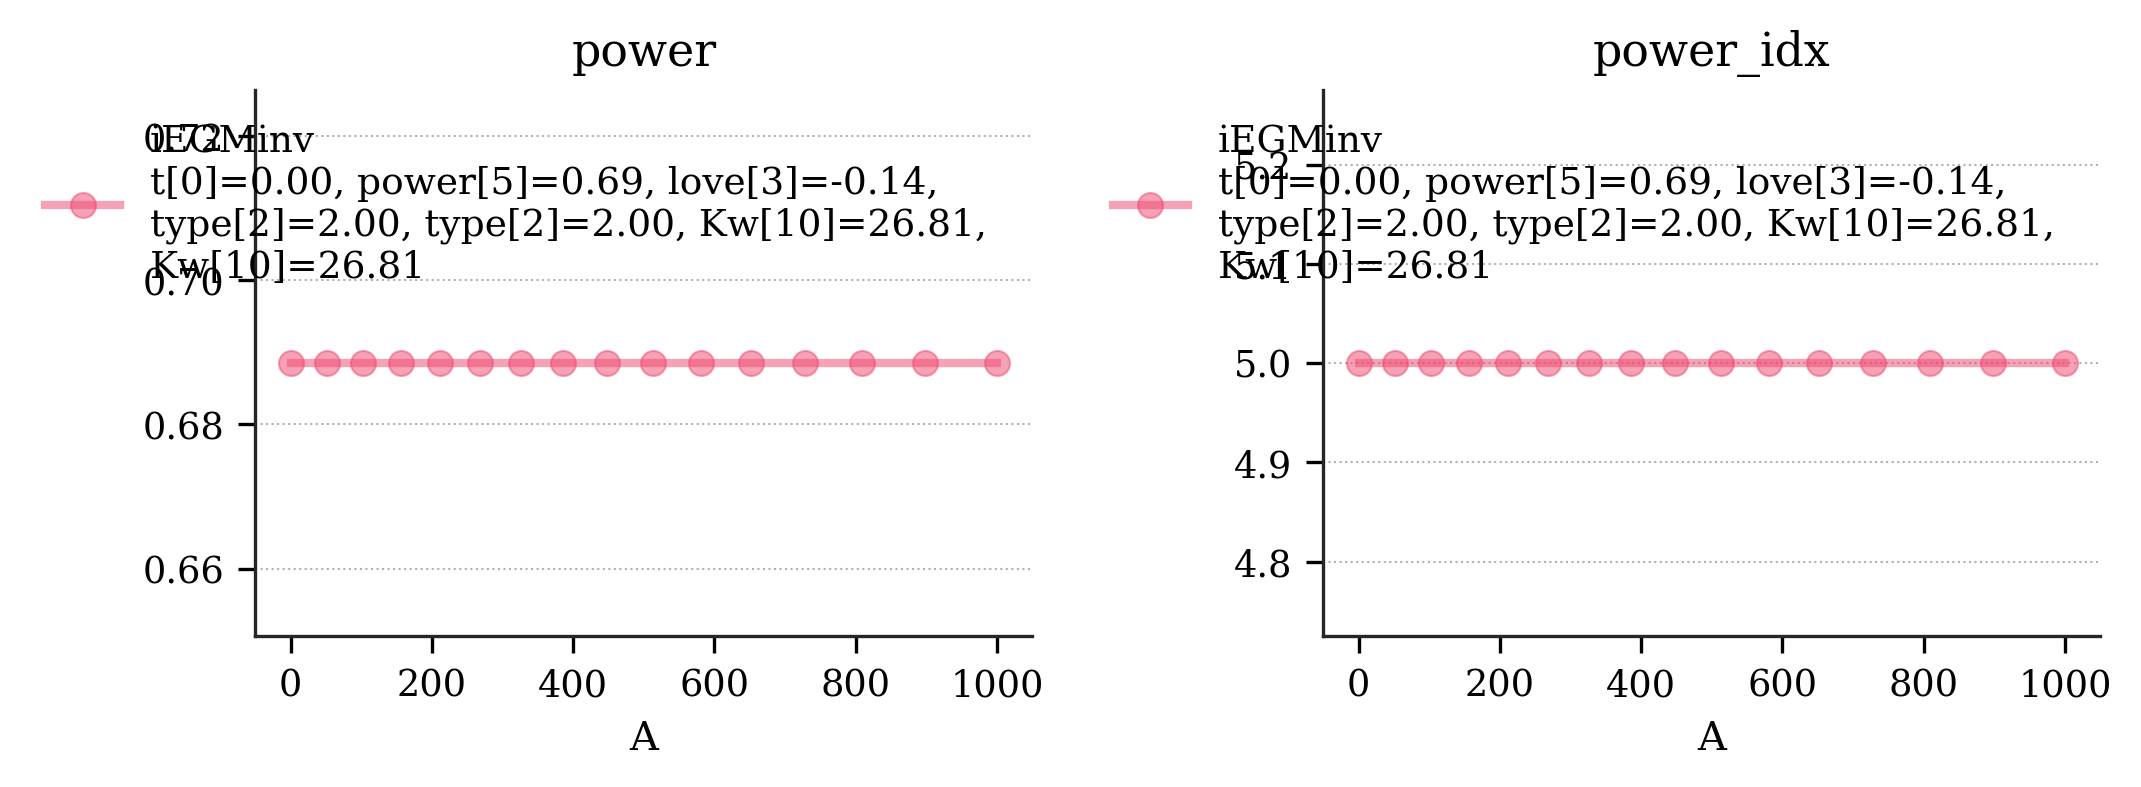

In [13]:
# model_iEGM.sol.power.shape #[idx['t'], idx['iP'], idx['iL'], :]
fig, ax = fm.create_figure(1,2,2)
if show_iEGM:    mp_iEGM.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_power(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="power")
else: fig.tight_layout()

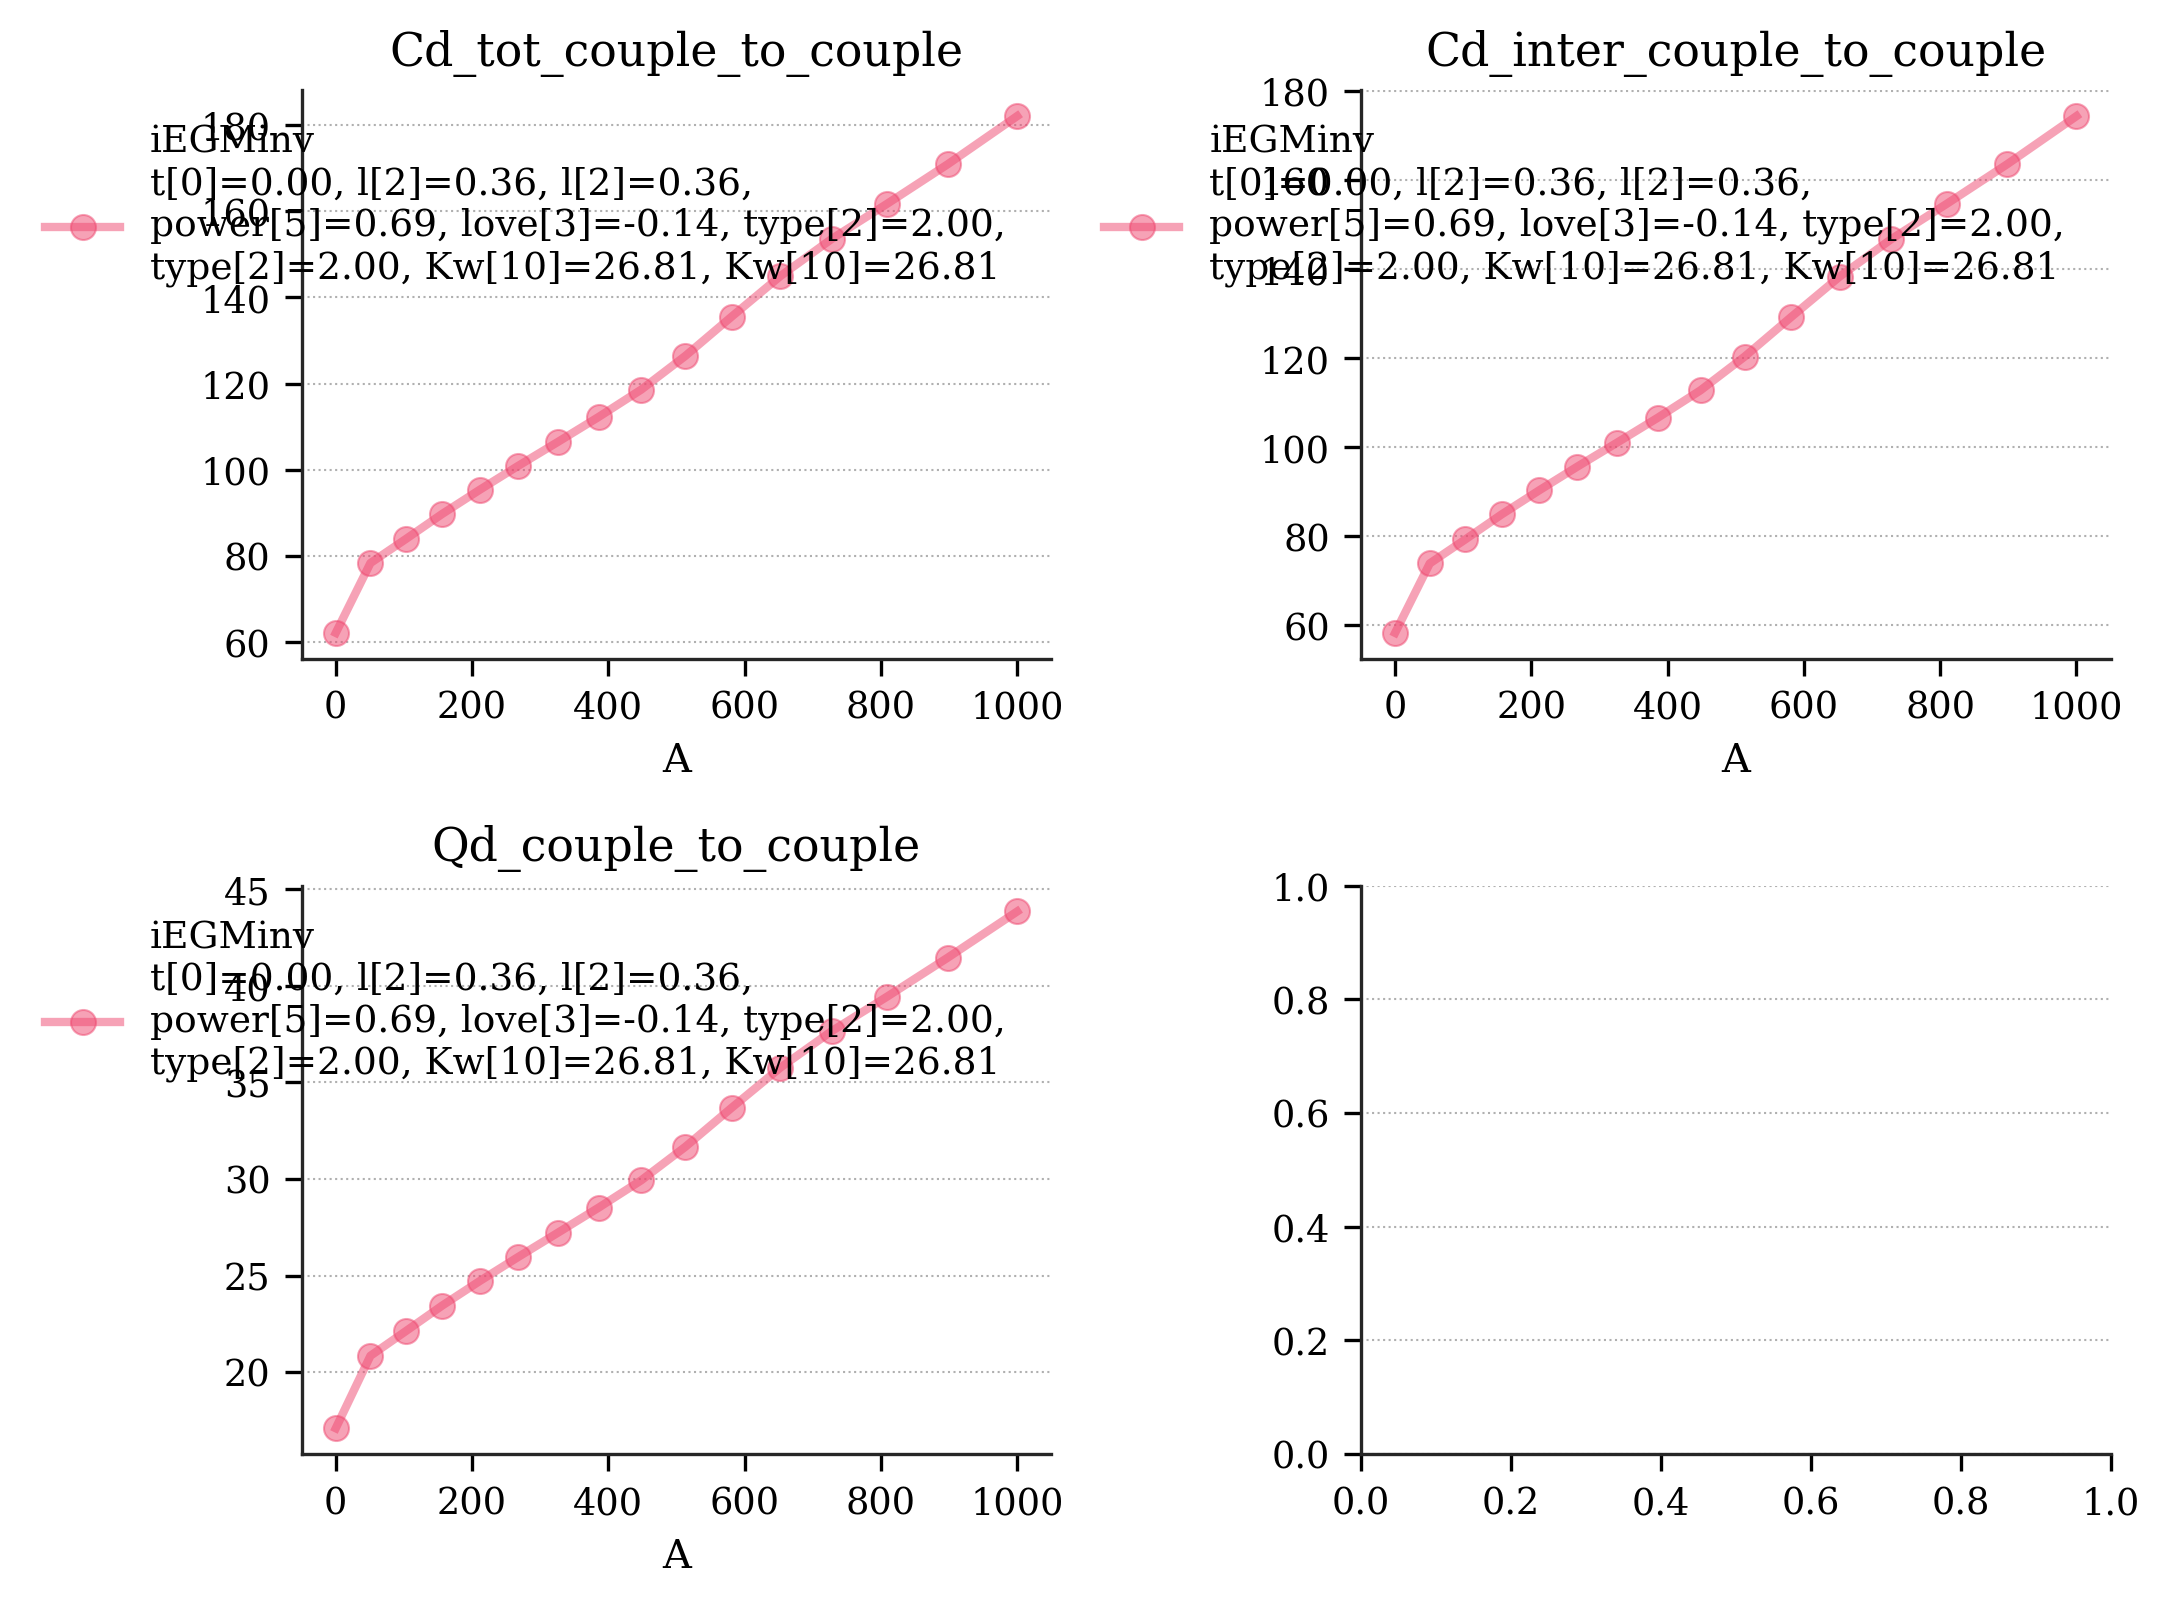

In [14]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_total_couple_choices(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="total_couple_choices")
else: fig.tight_layout()


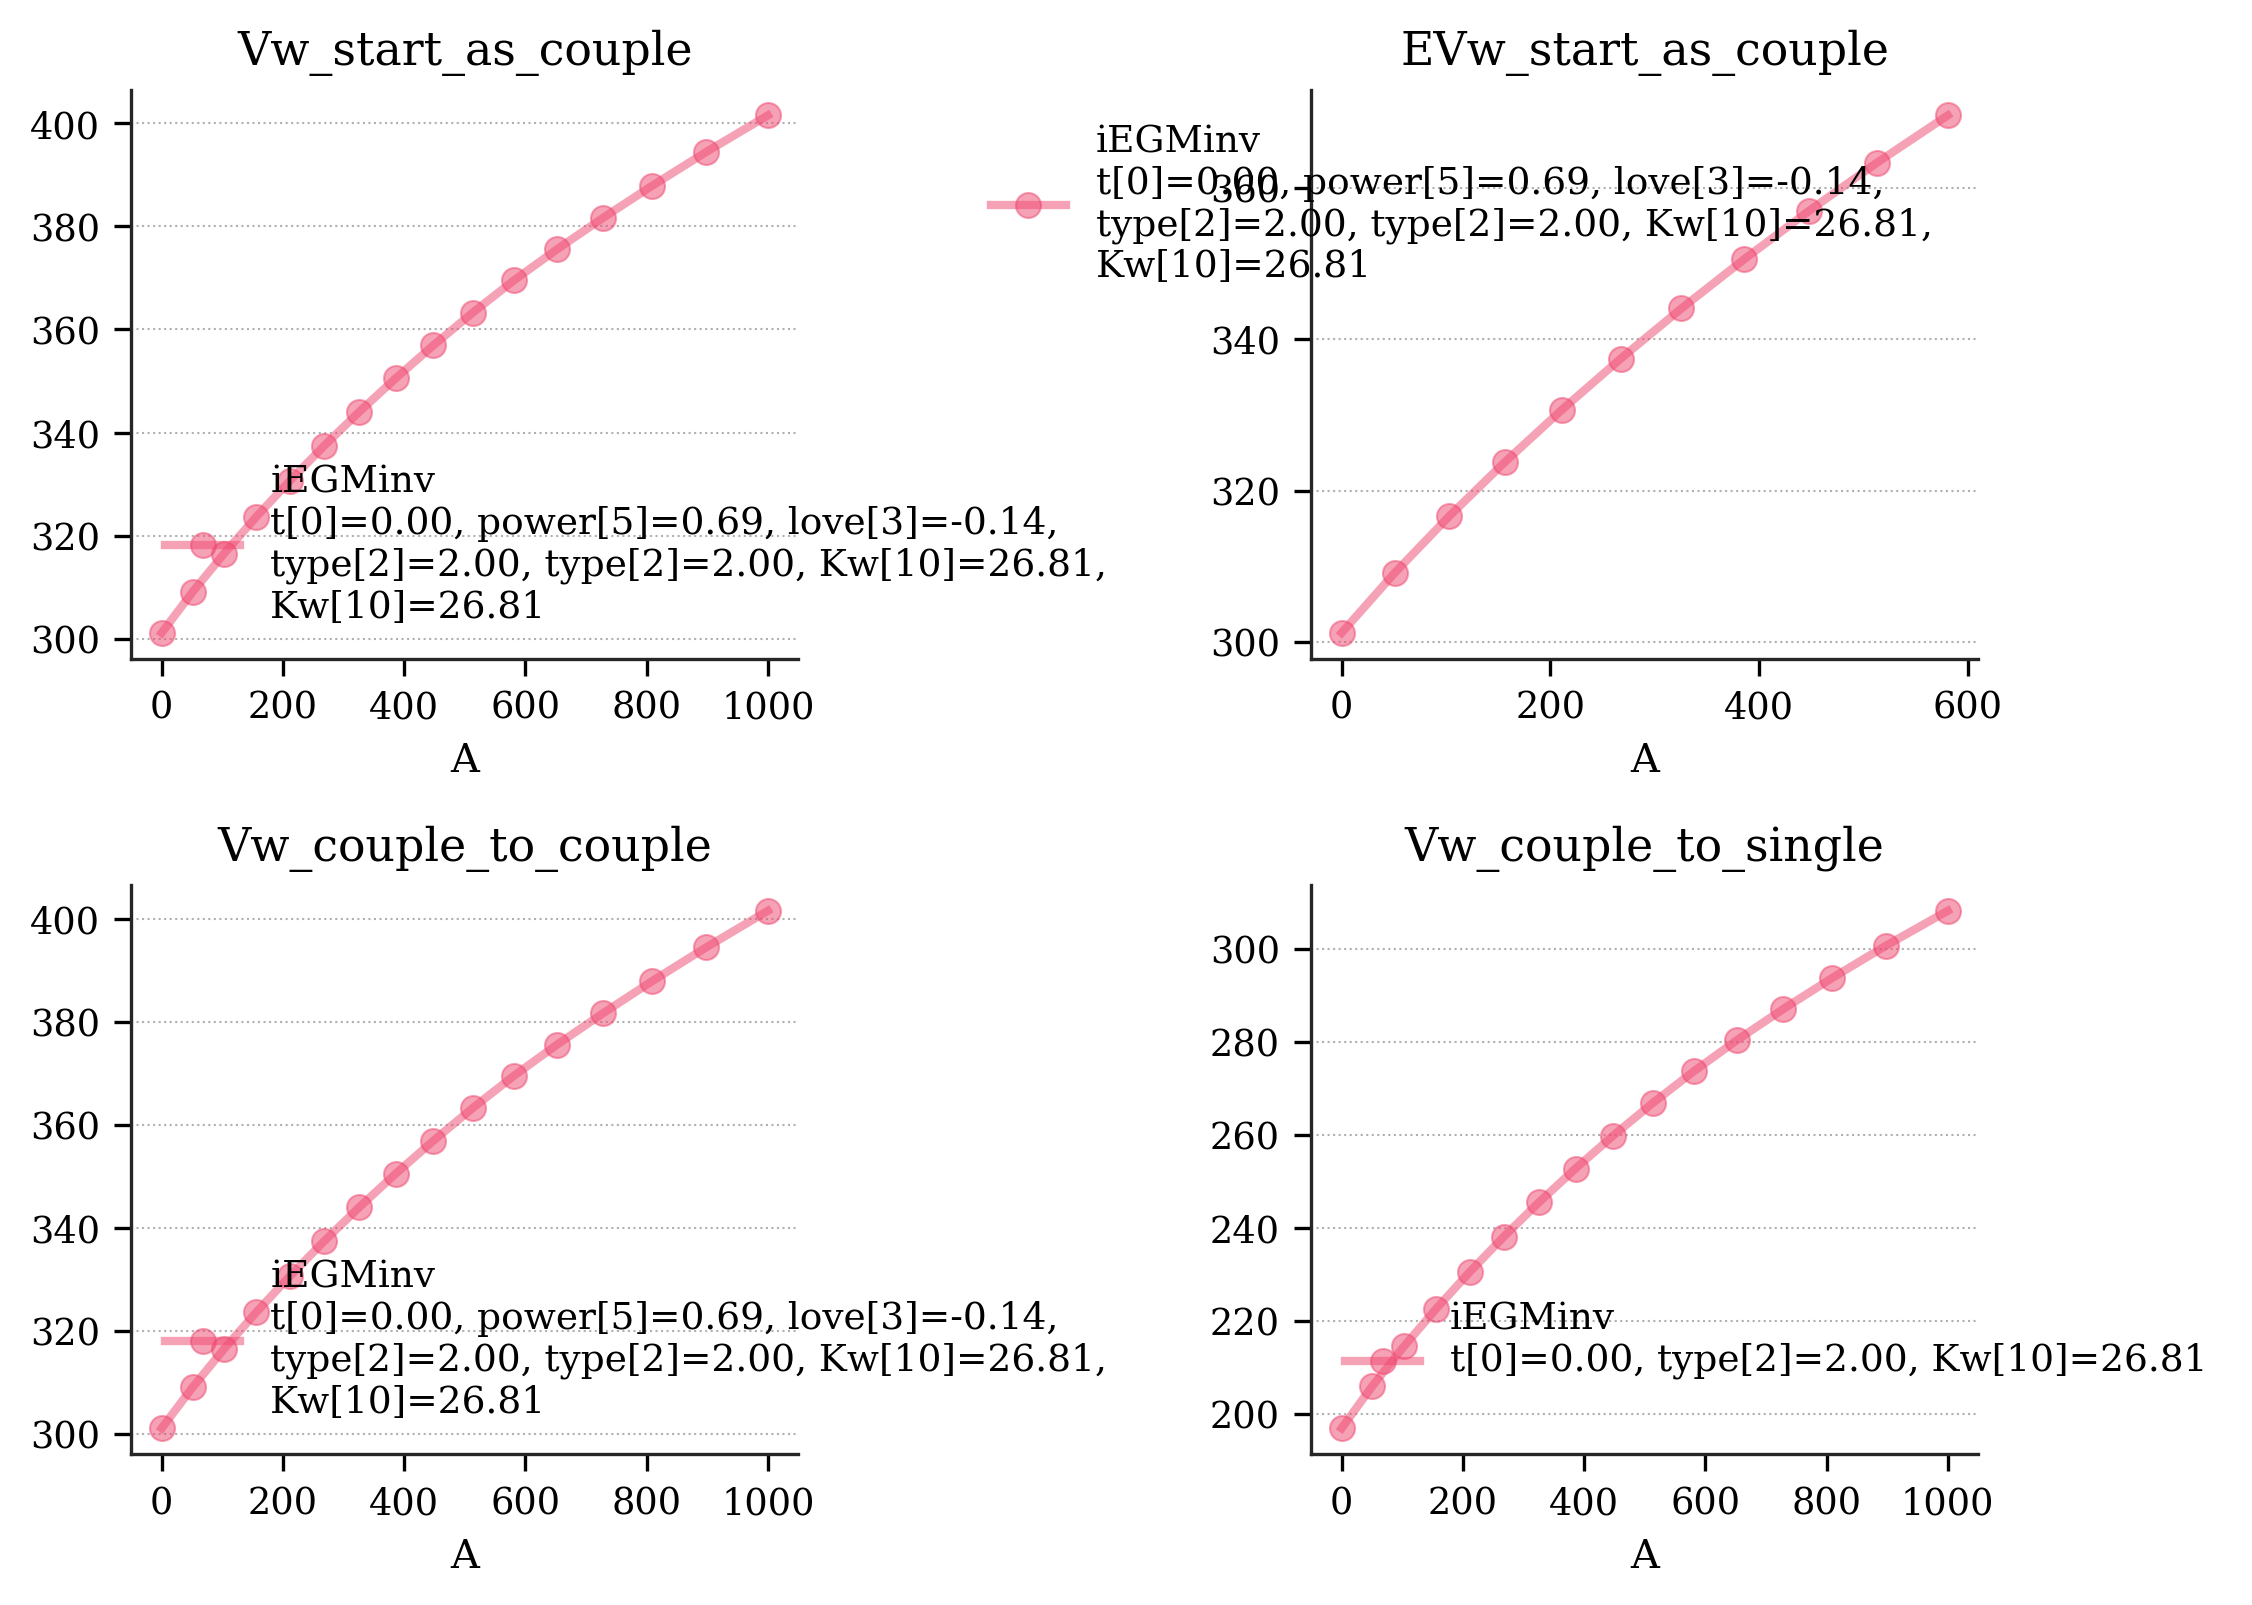

In [15]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_female_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="female_couple_values")
else: fig.tight_layout()


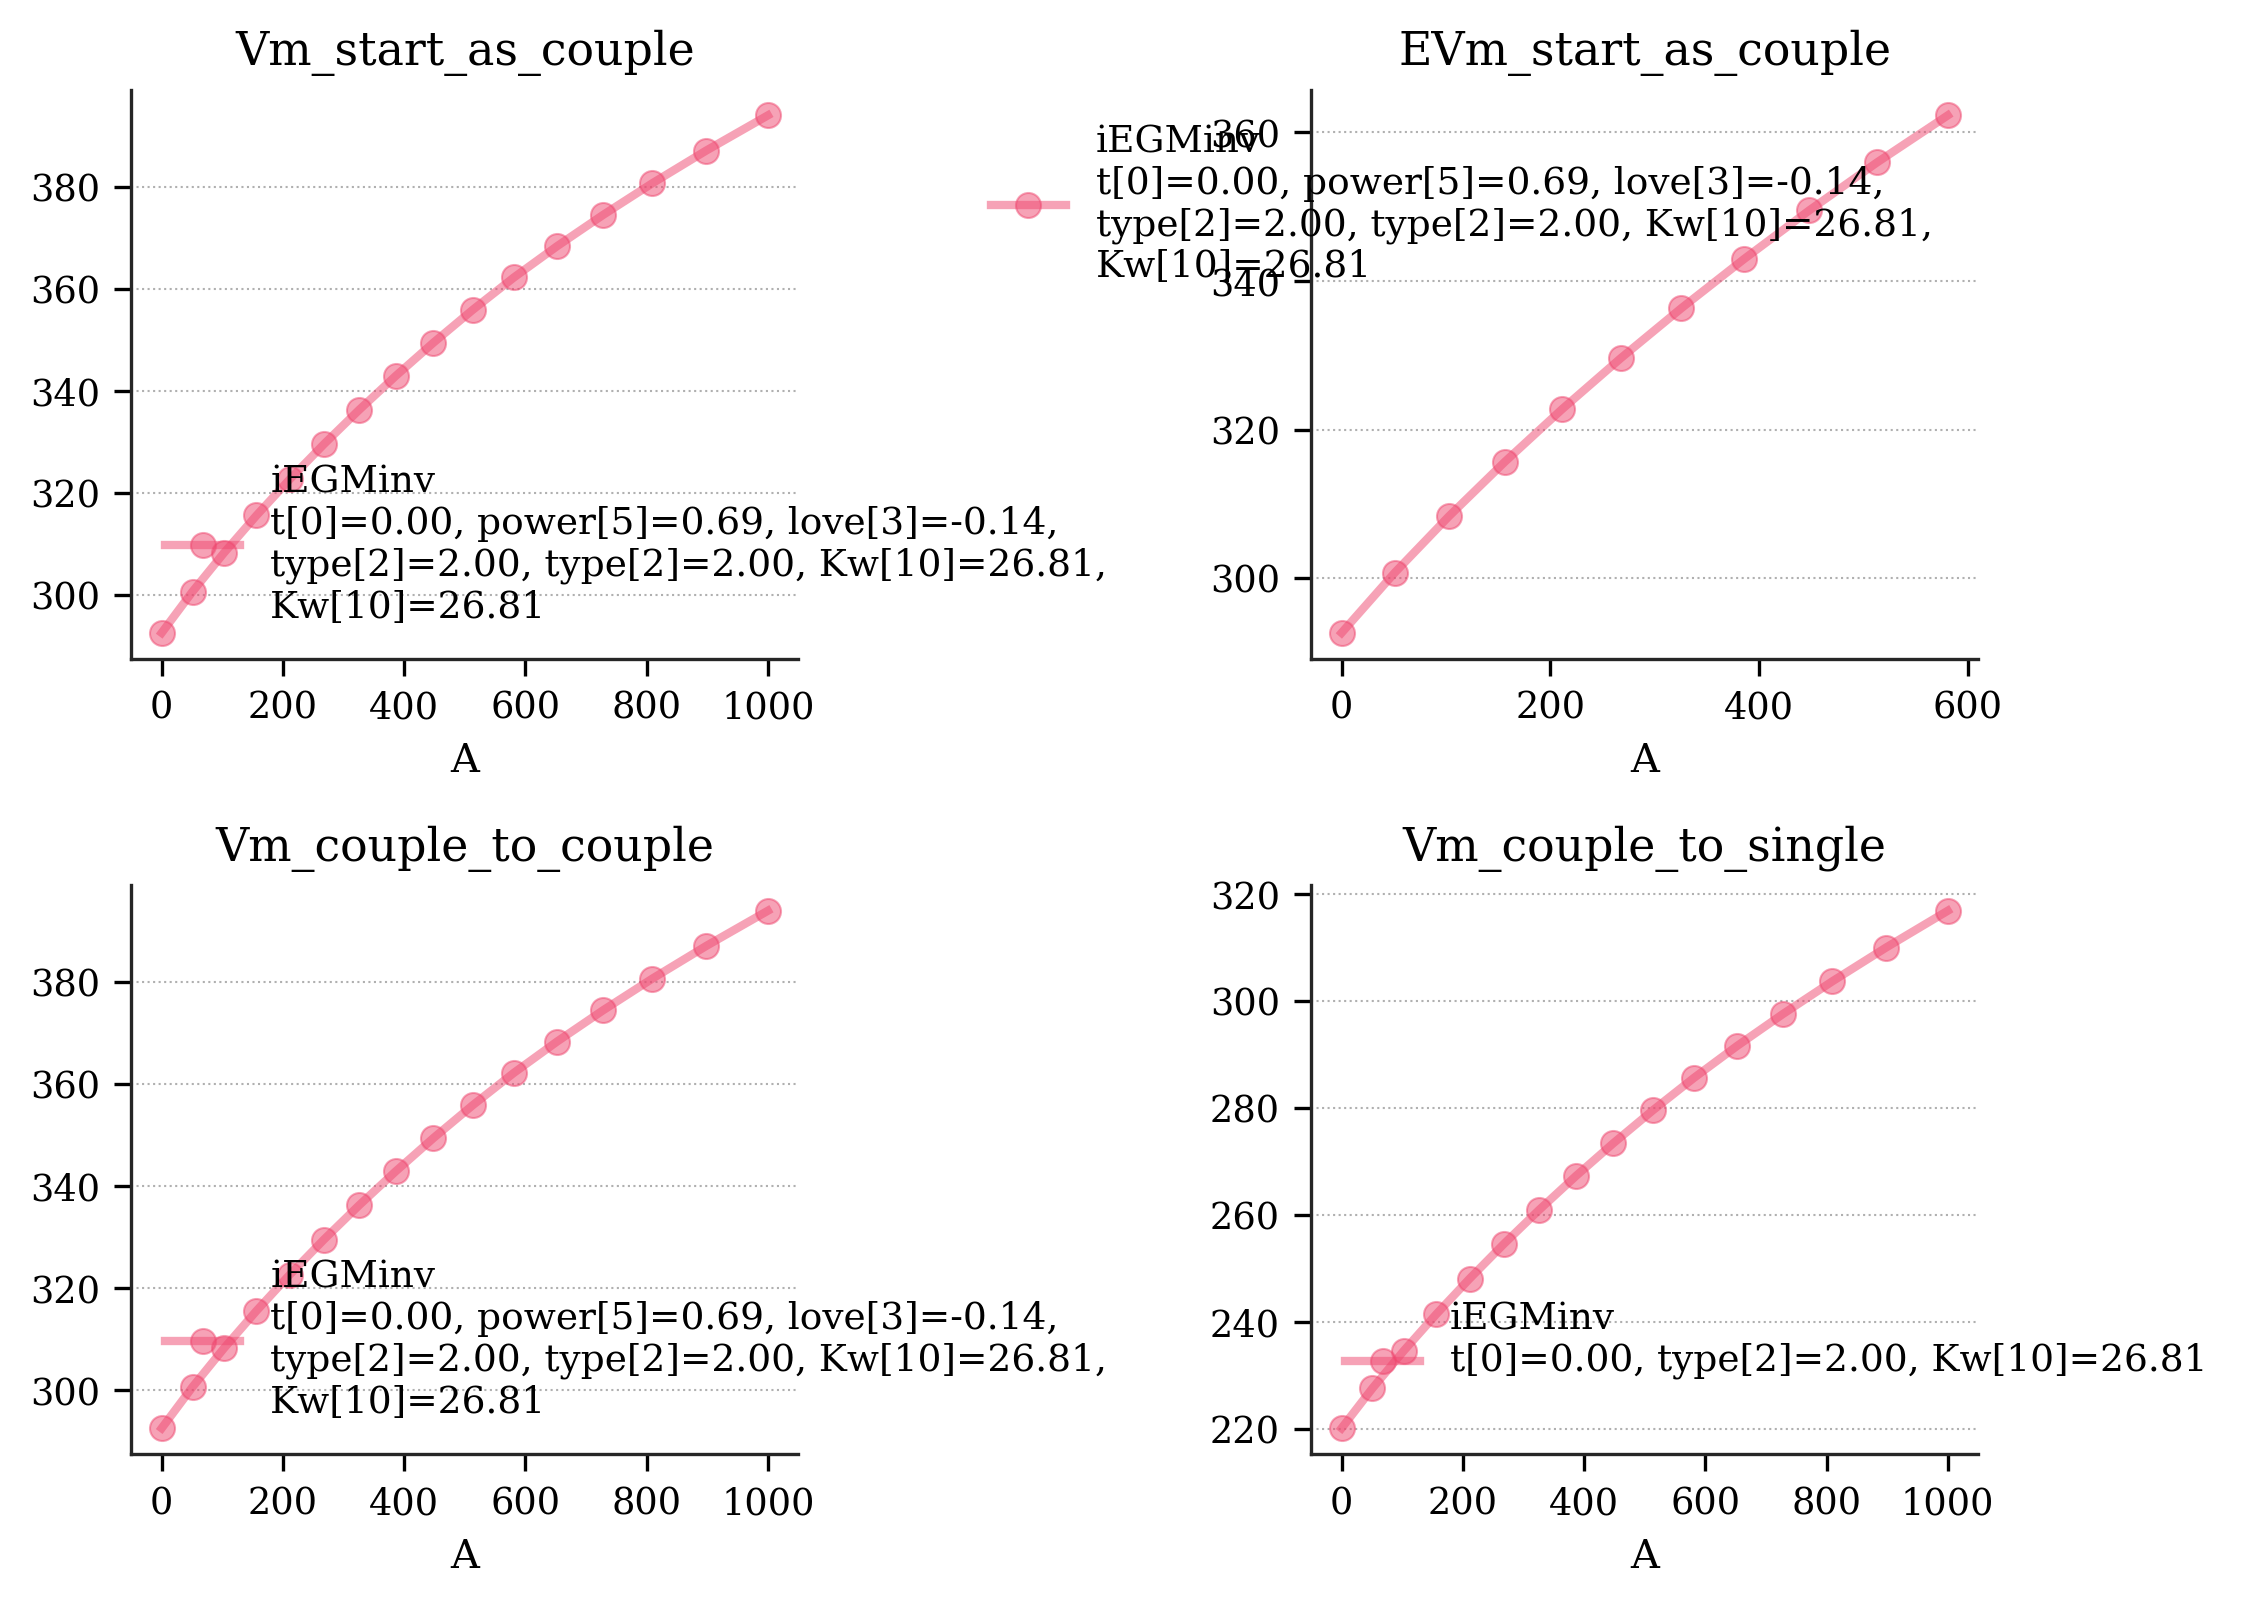

In [16]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_male_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="male_couple_values")
else: fig.tight_layout()


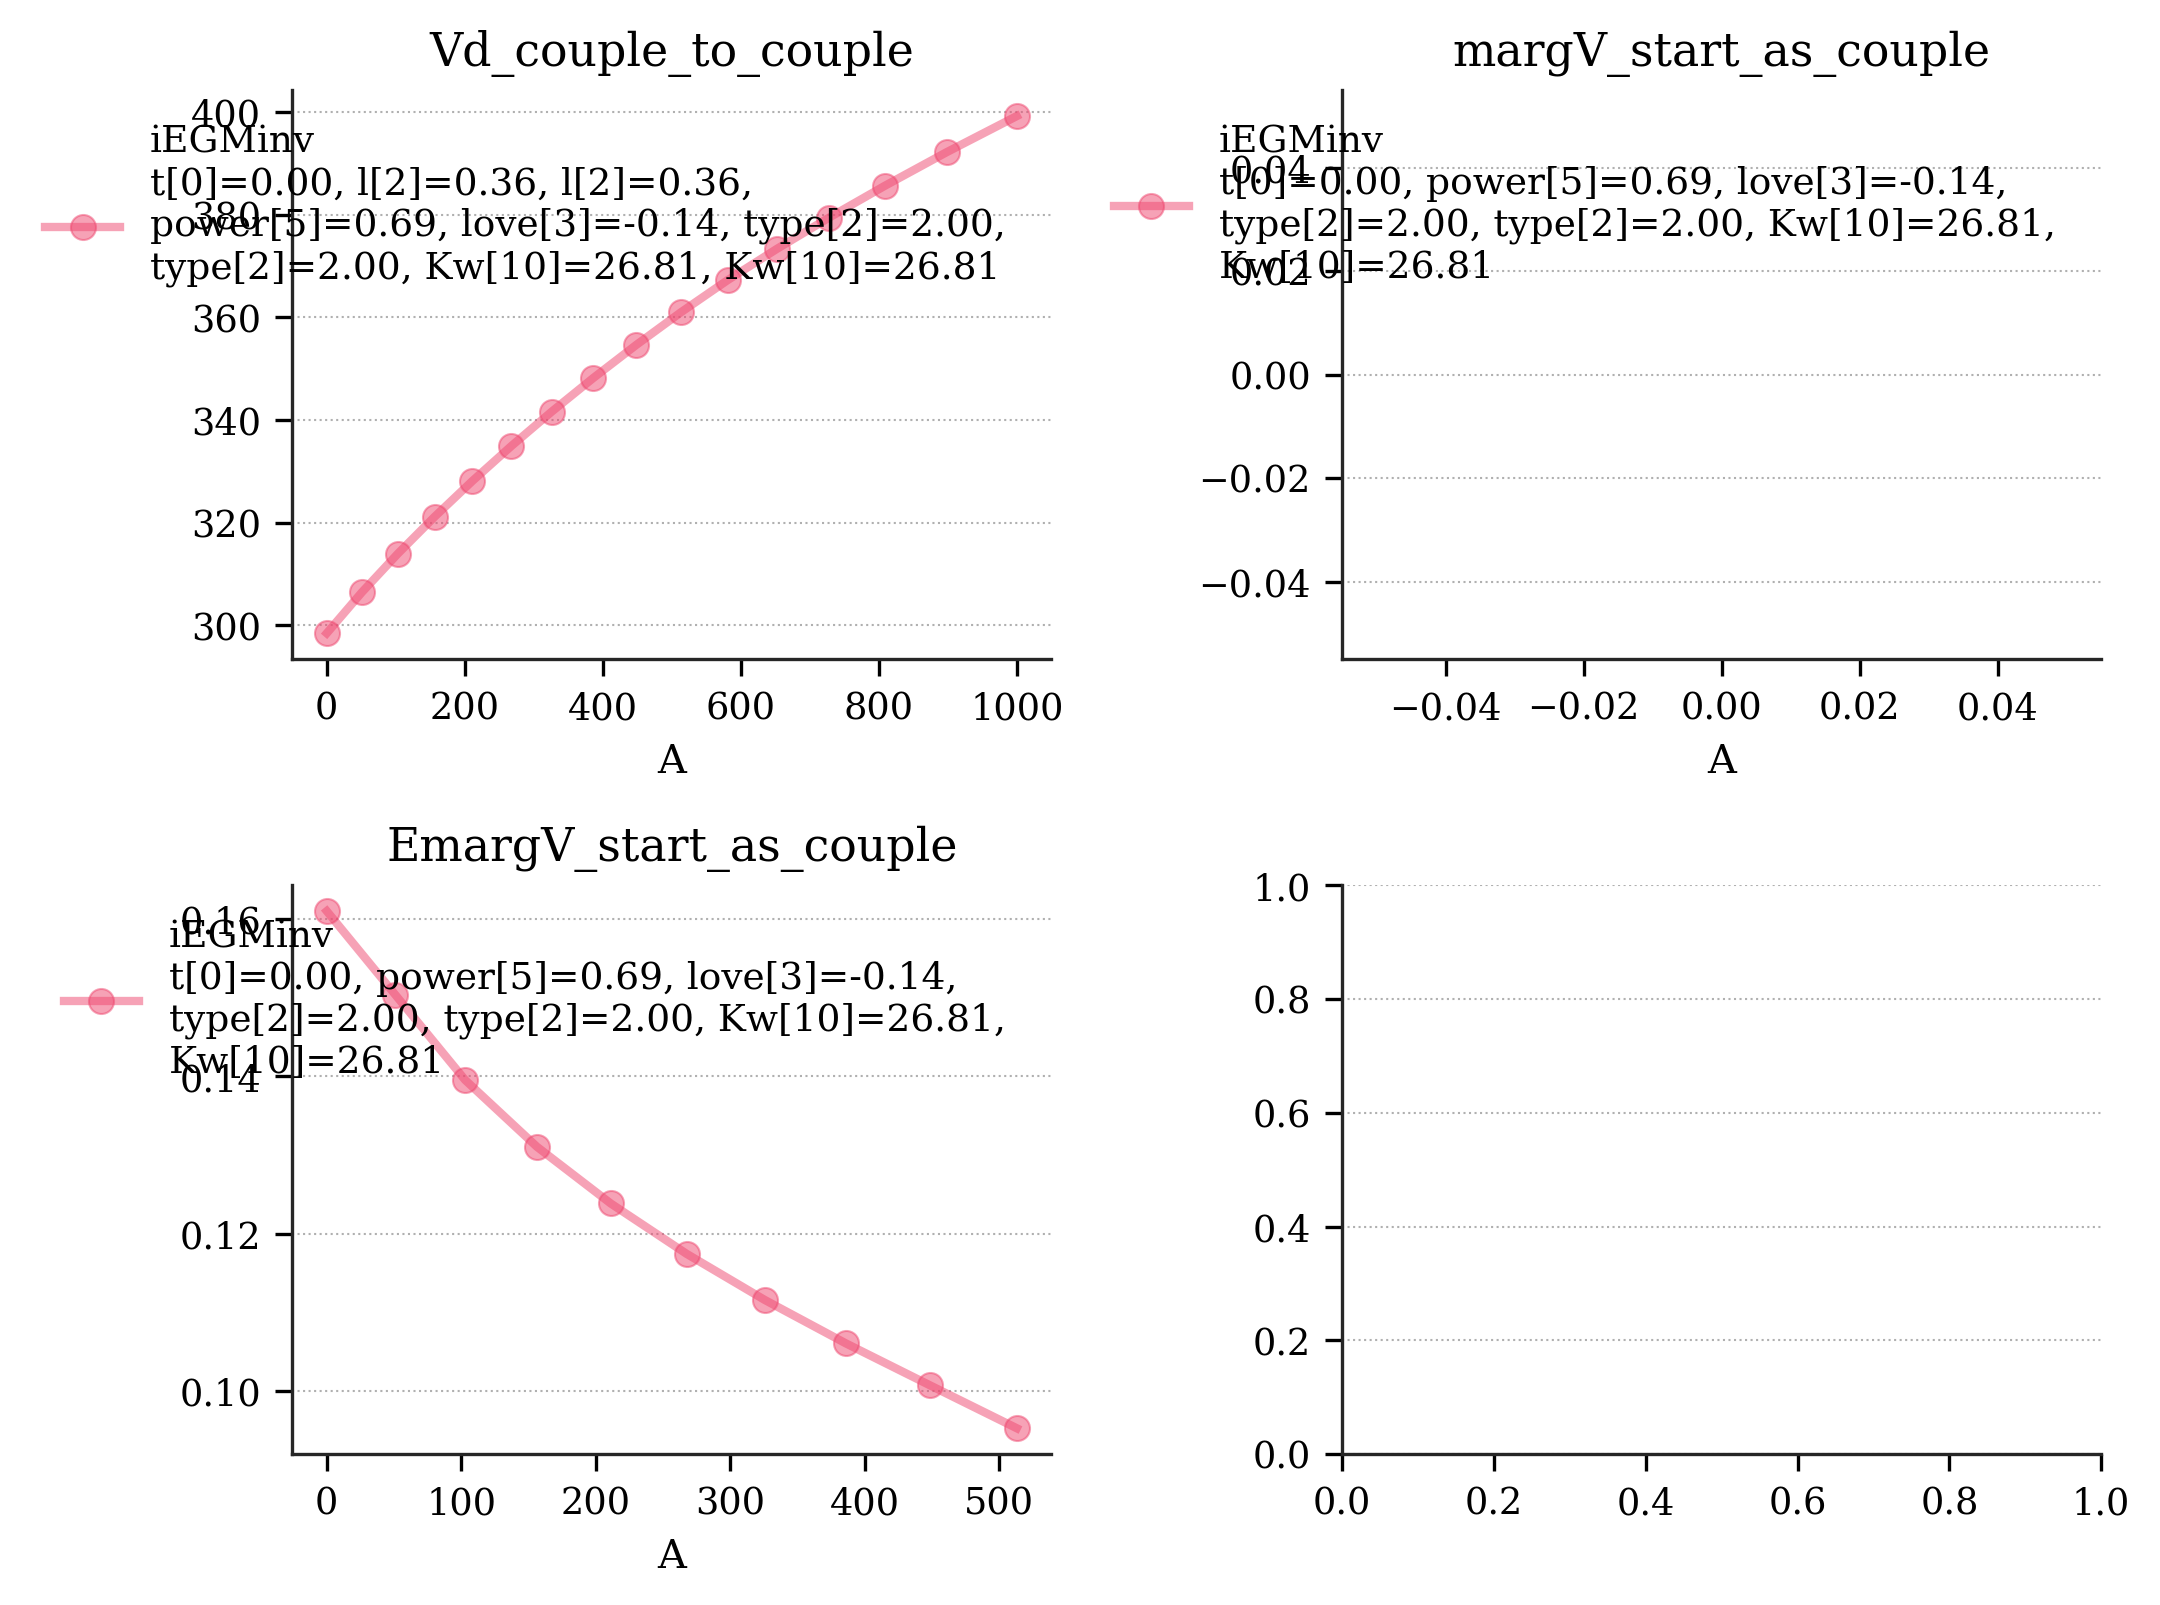

In [17]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_VFI:     mp_VFI.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_total_couple_values(ax, grid=grid, index=idx, alpha=0.5)
if save_figures: fm.save_figure(filename="total_couple_values")
else: fig.tight_layout()


## Simulation

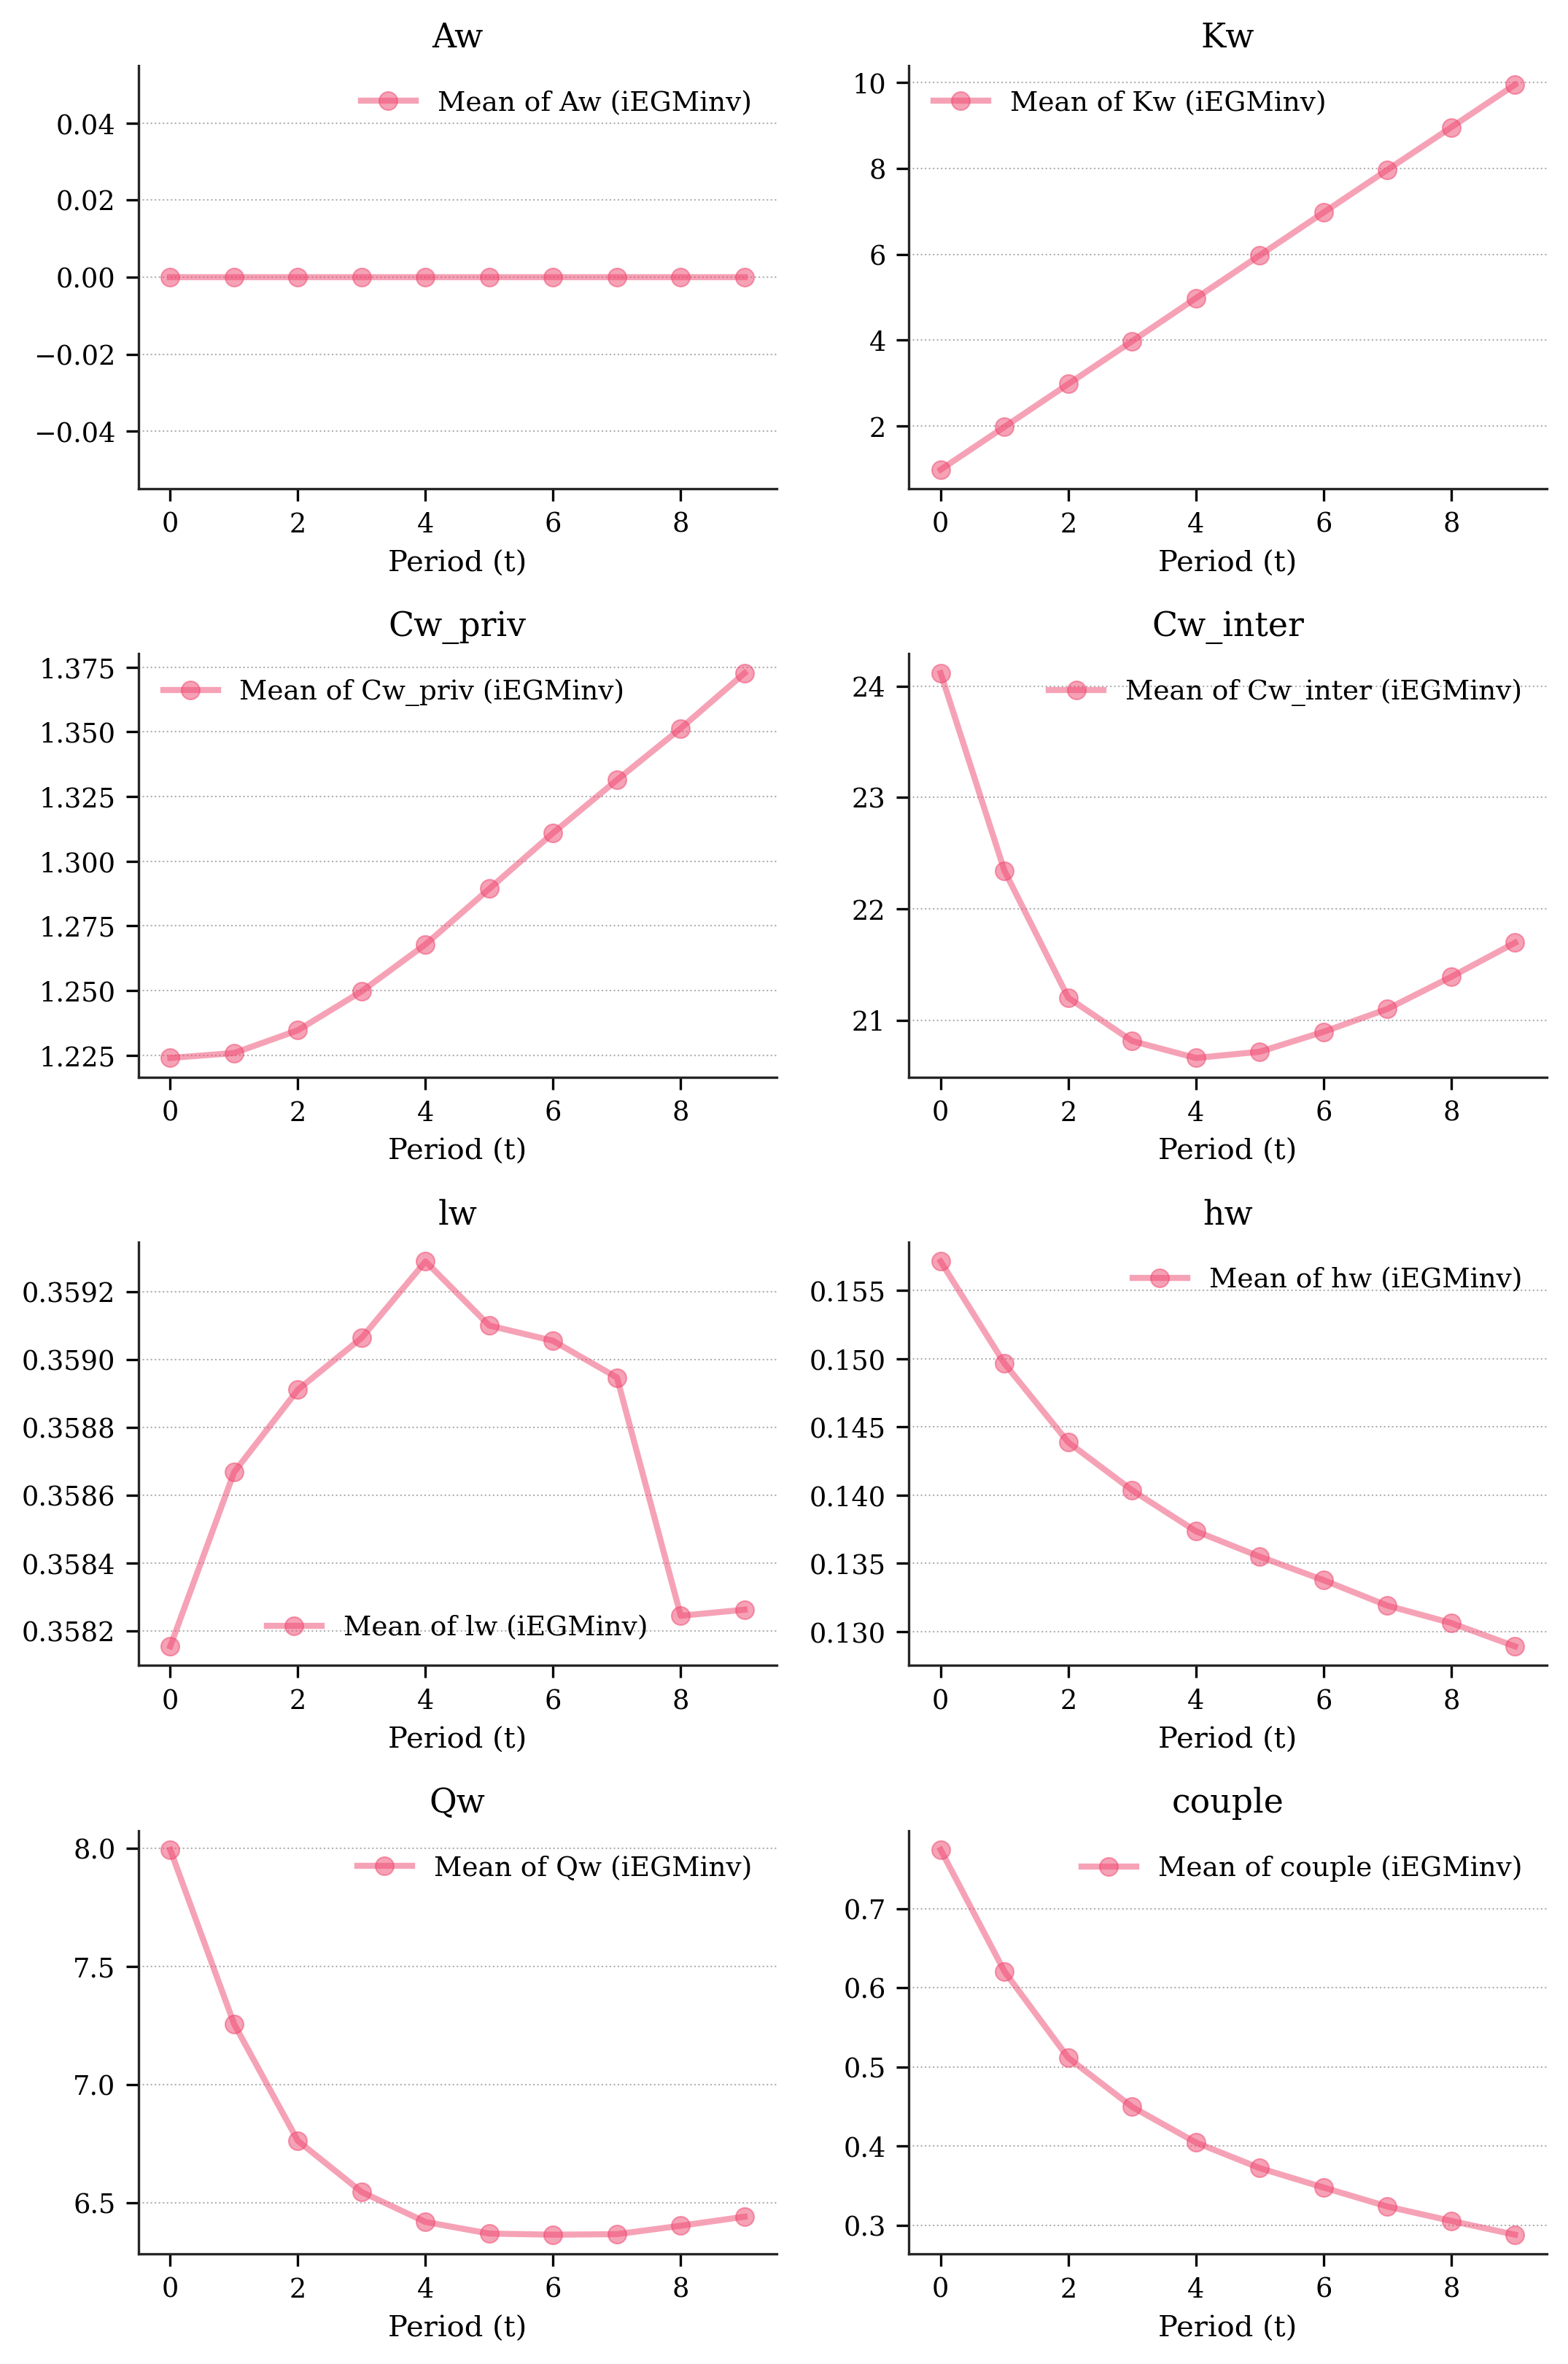

In [18]:
fig, ax = fm.create_figure(4,2,8)
if show_iEGM:    mp_iEGM.plot_sim_female(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_female(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_female(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_female(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_female_all")
else: fig.tight_layout()

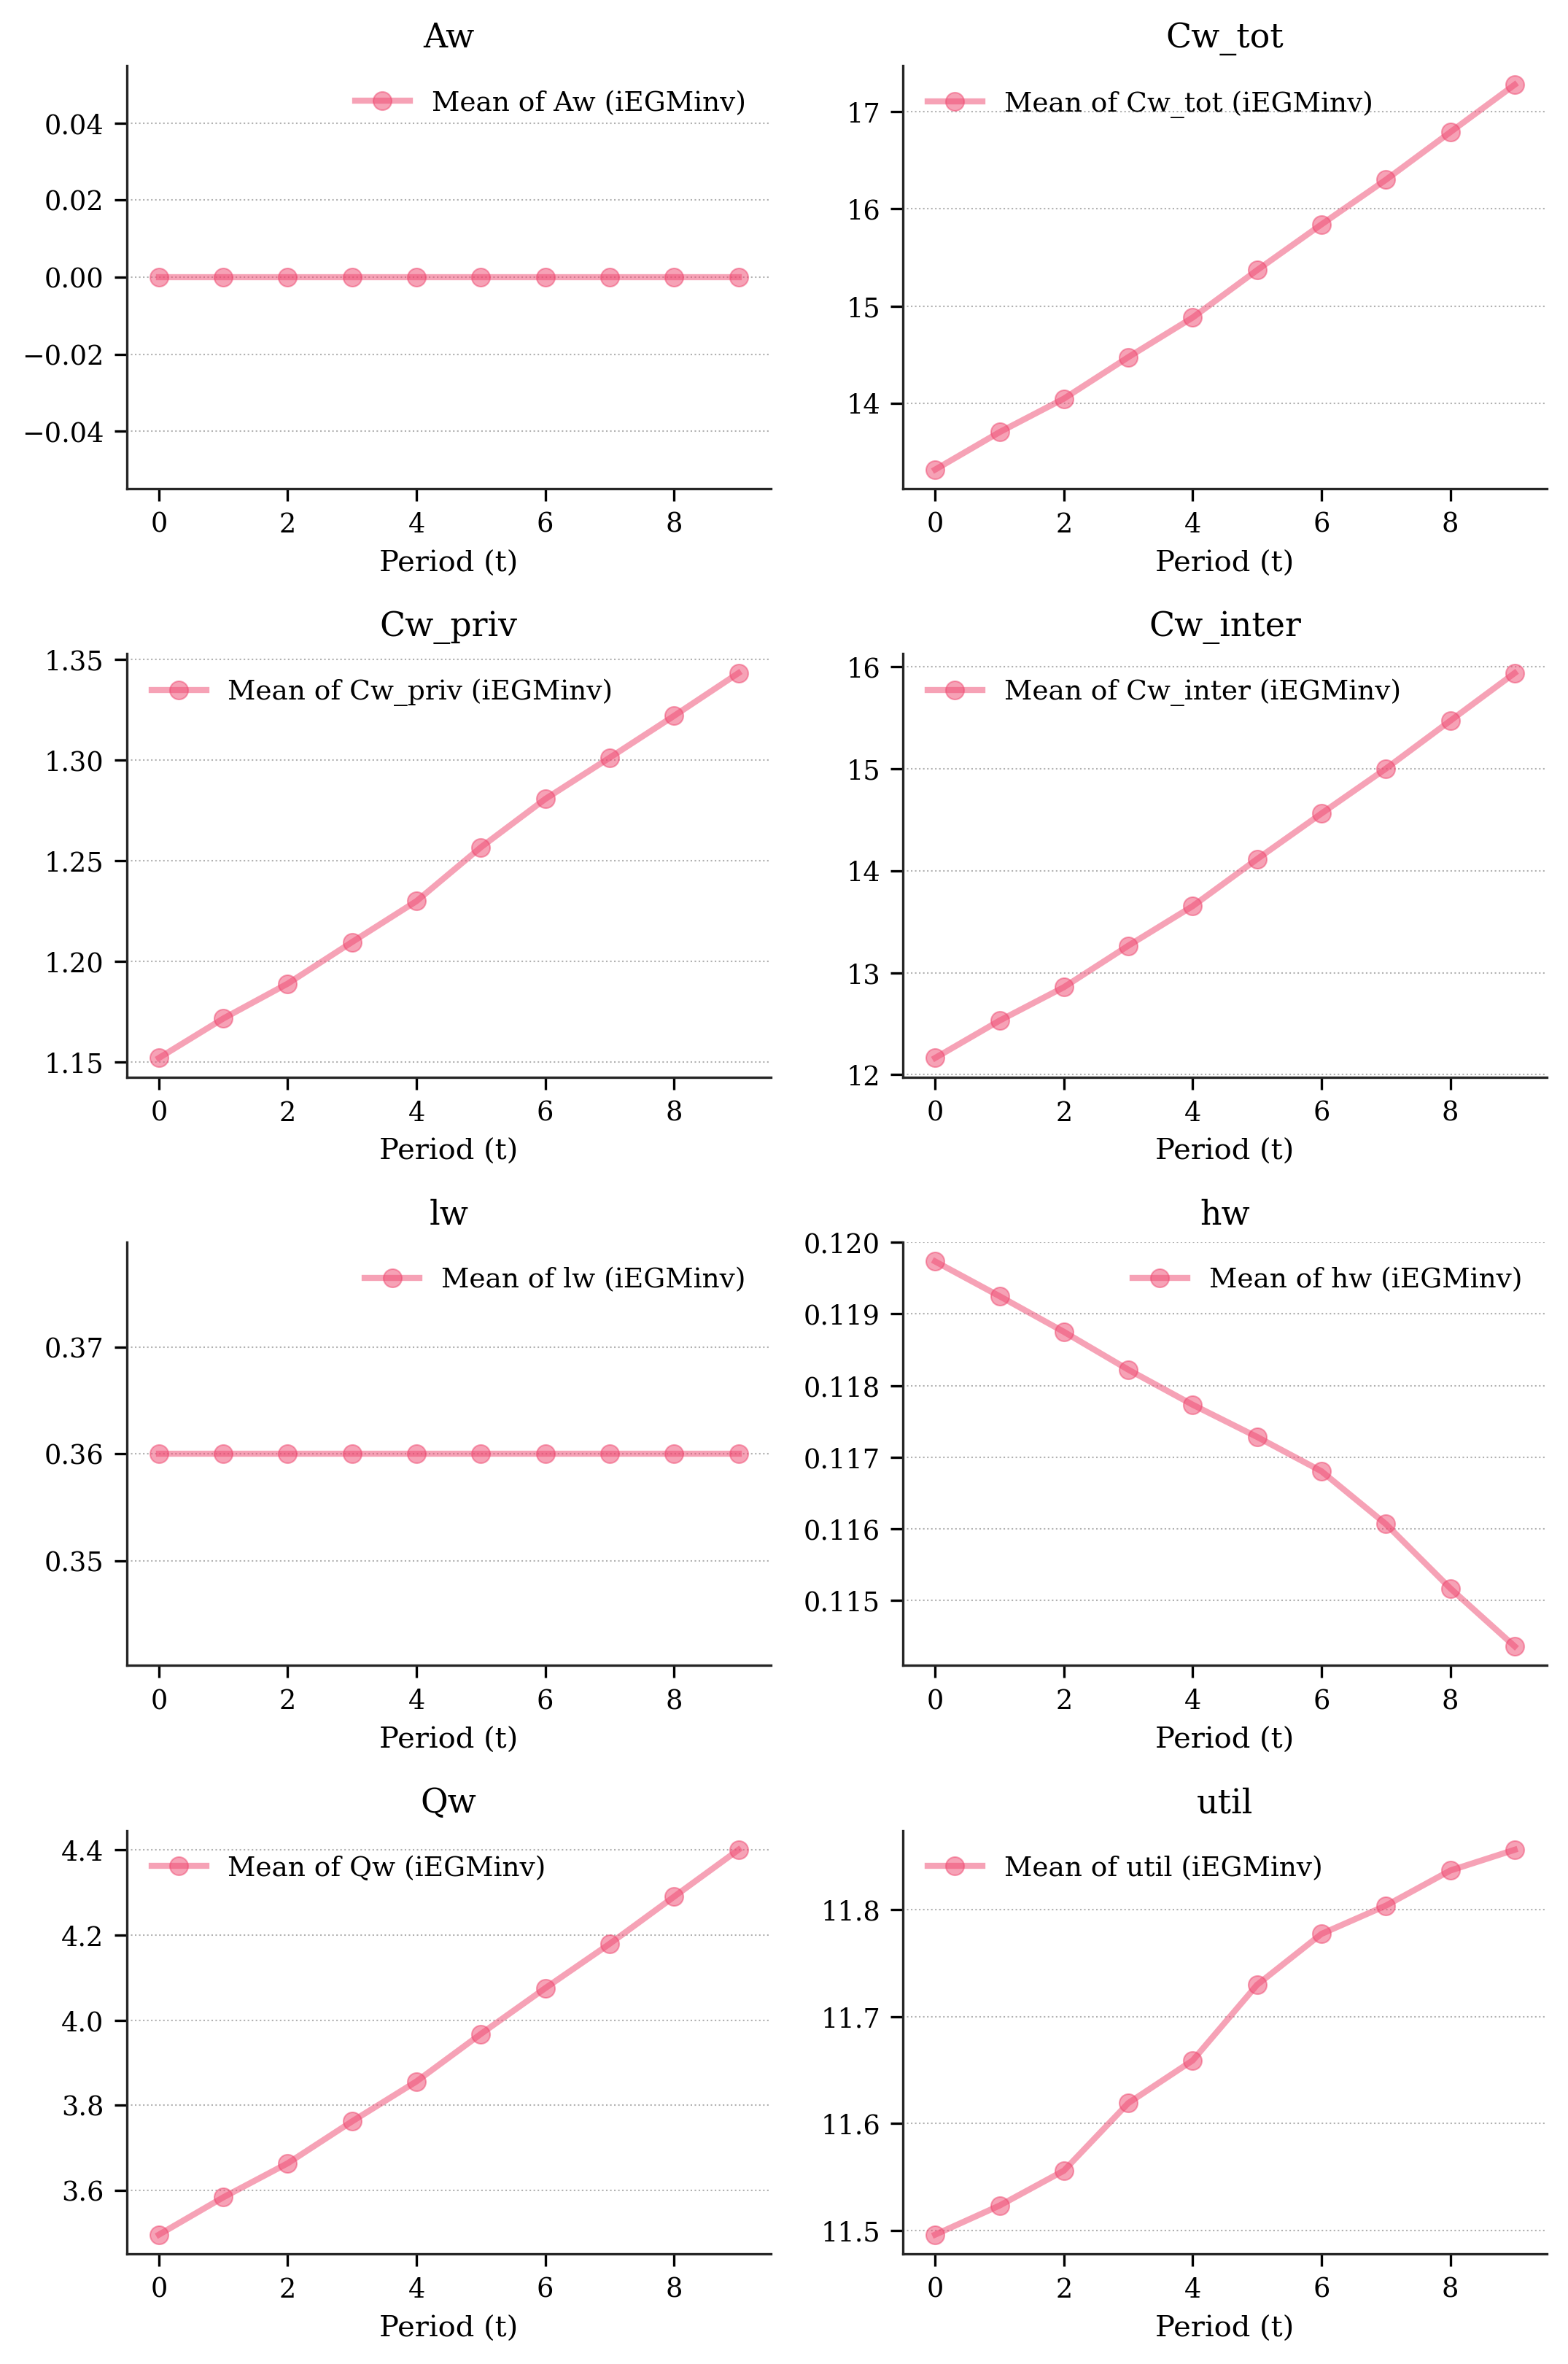

In [19]:
fig, ax = fm.create_figure(4,2,8)
if show_iEGM:    mp_iEGM.plot_sim_female_single(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_female_single(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_female_single(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_female_single(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_female_single")
else: fig.tight_layout()

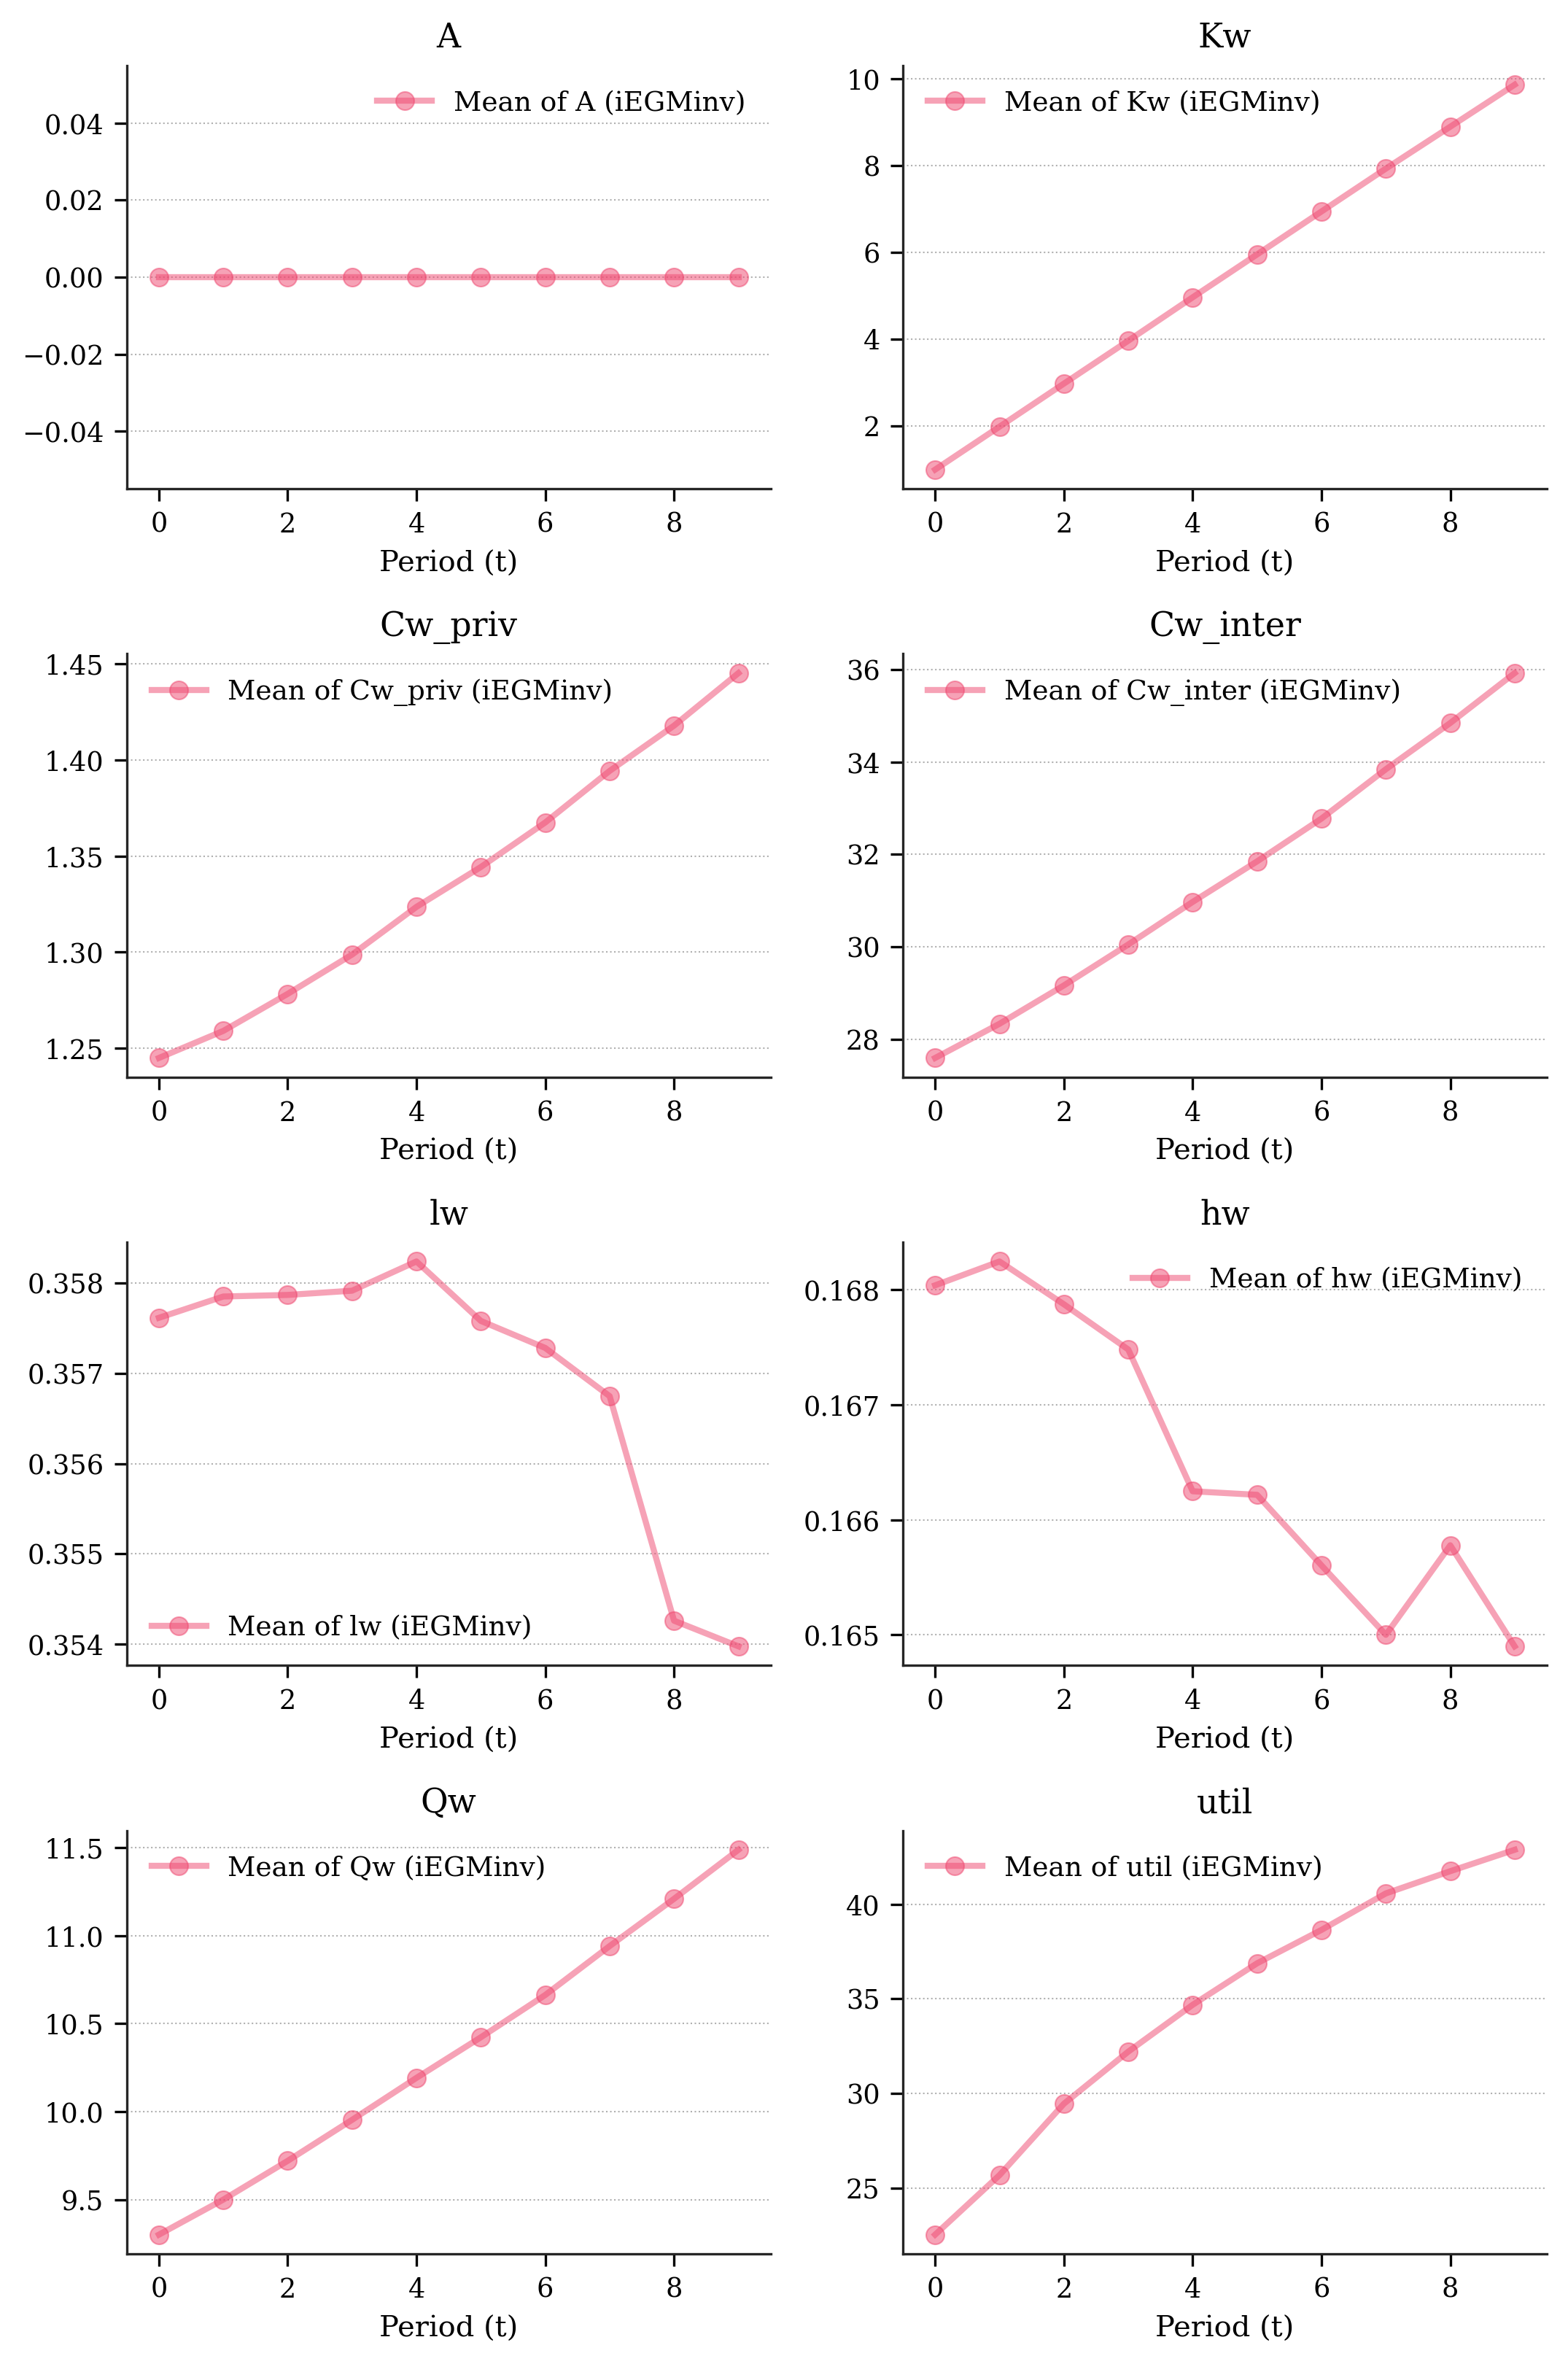

In [20]:
fig, ax = fm.create_figure(4,2,8)
if show_iEGM:    mp_iEGM.plot_sim_female_couple(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_female_couple(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_female_couple(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_female_couple(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_female_couple")
else: fig.tight_layout()

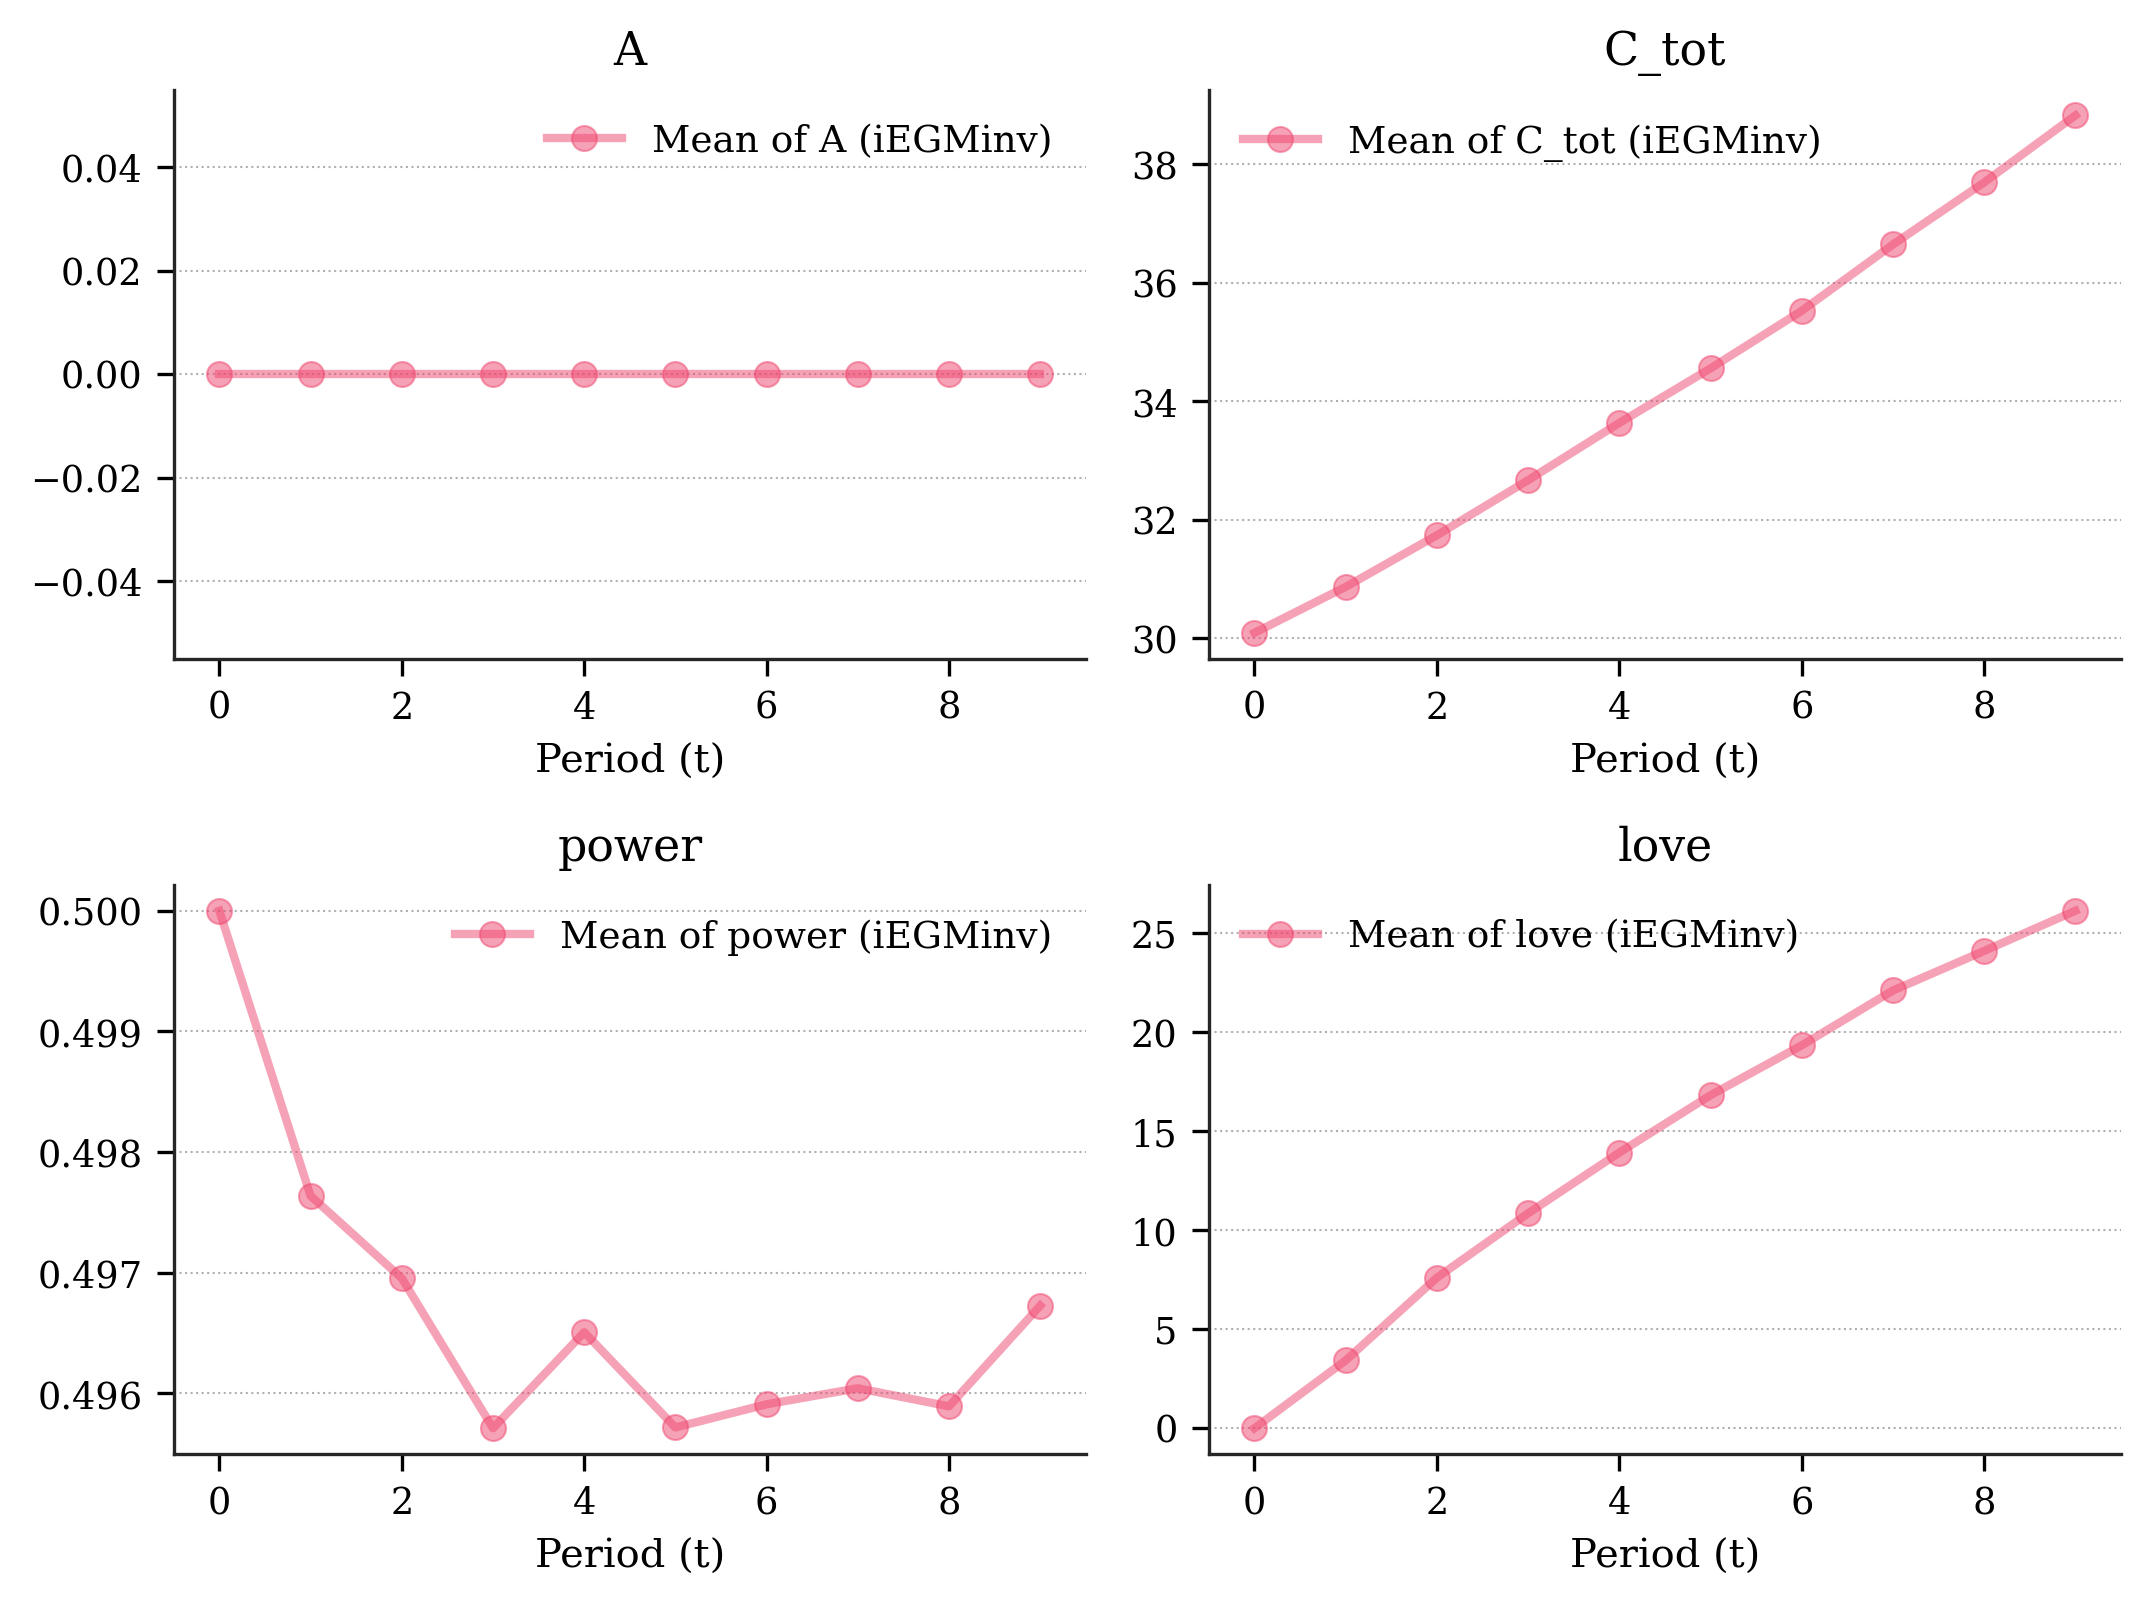

In [21]:
fig, ax = fm.create_figure(2,2,4)
if show_iEGM:    mp_iEGM.plot_sim_couple(ax, alpha=0.5)
if show_VFI:     mp_VFI.plot_sim_couple(ax, alpha=0.5)
if show_numEGM:  mp_numEGM.plot_sim_couple(ax, alpha=0.5)
if show_iEGMinv: mp_iEGMinv.plot_sim_couple(ax, alpha=0.5)
if save_figures: fm.save_figure(filename="sim_couple")
else: fig.tight_layout()

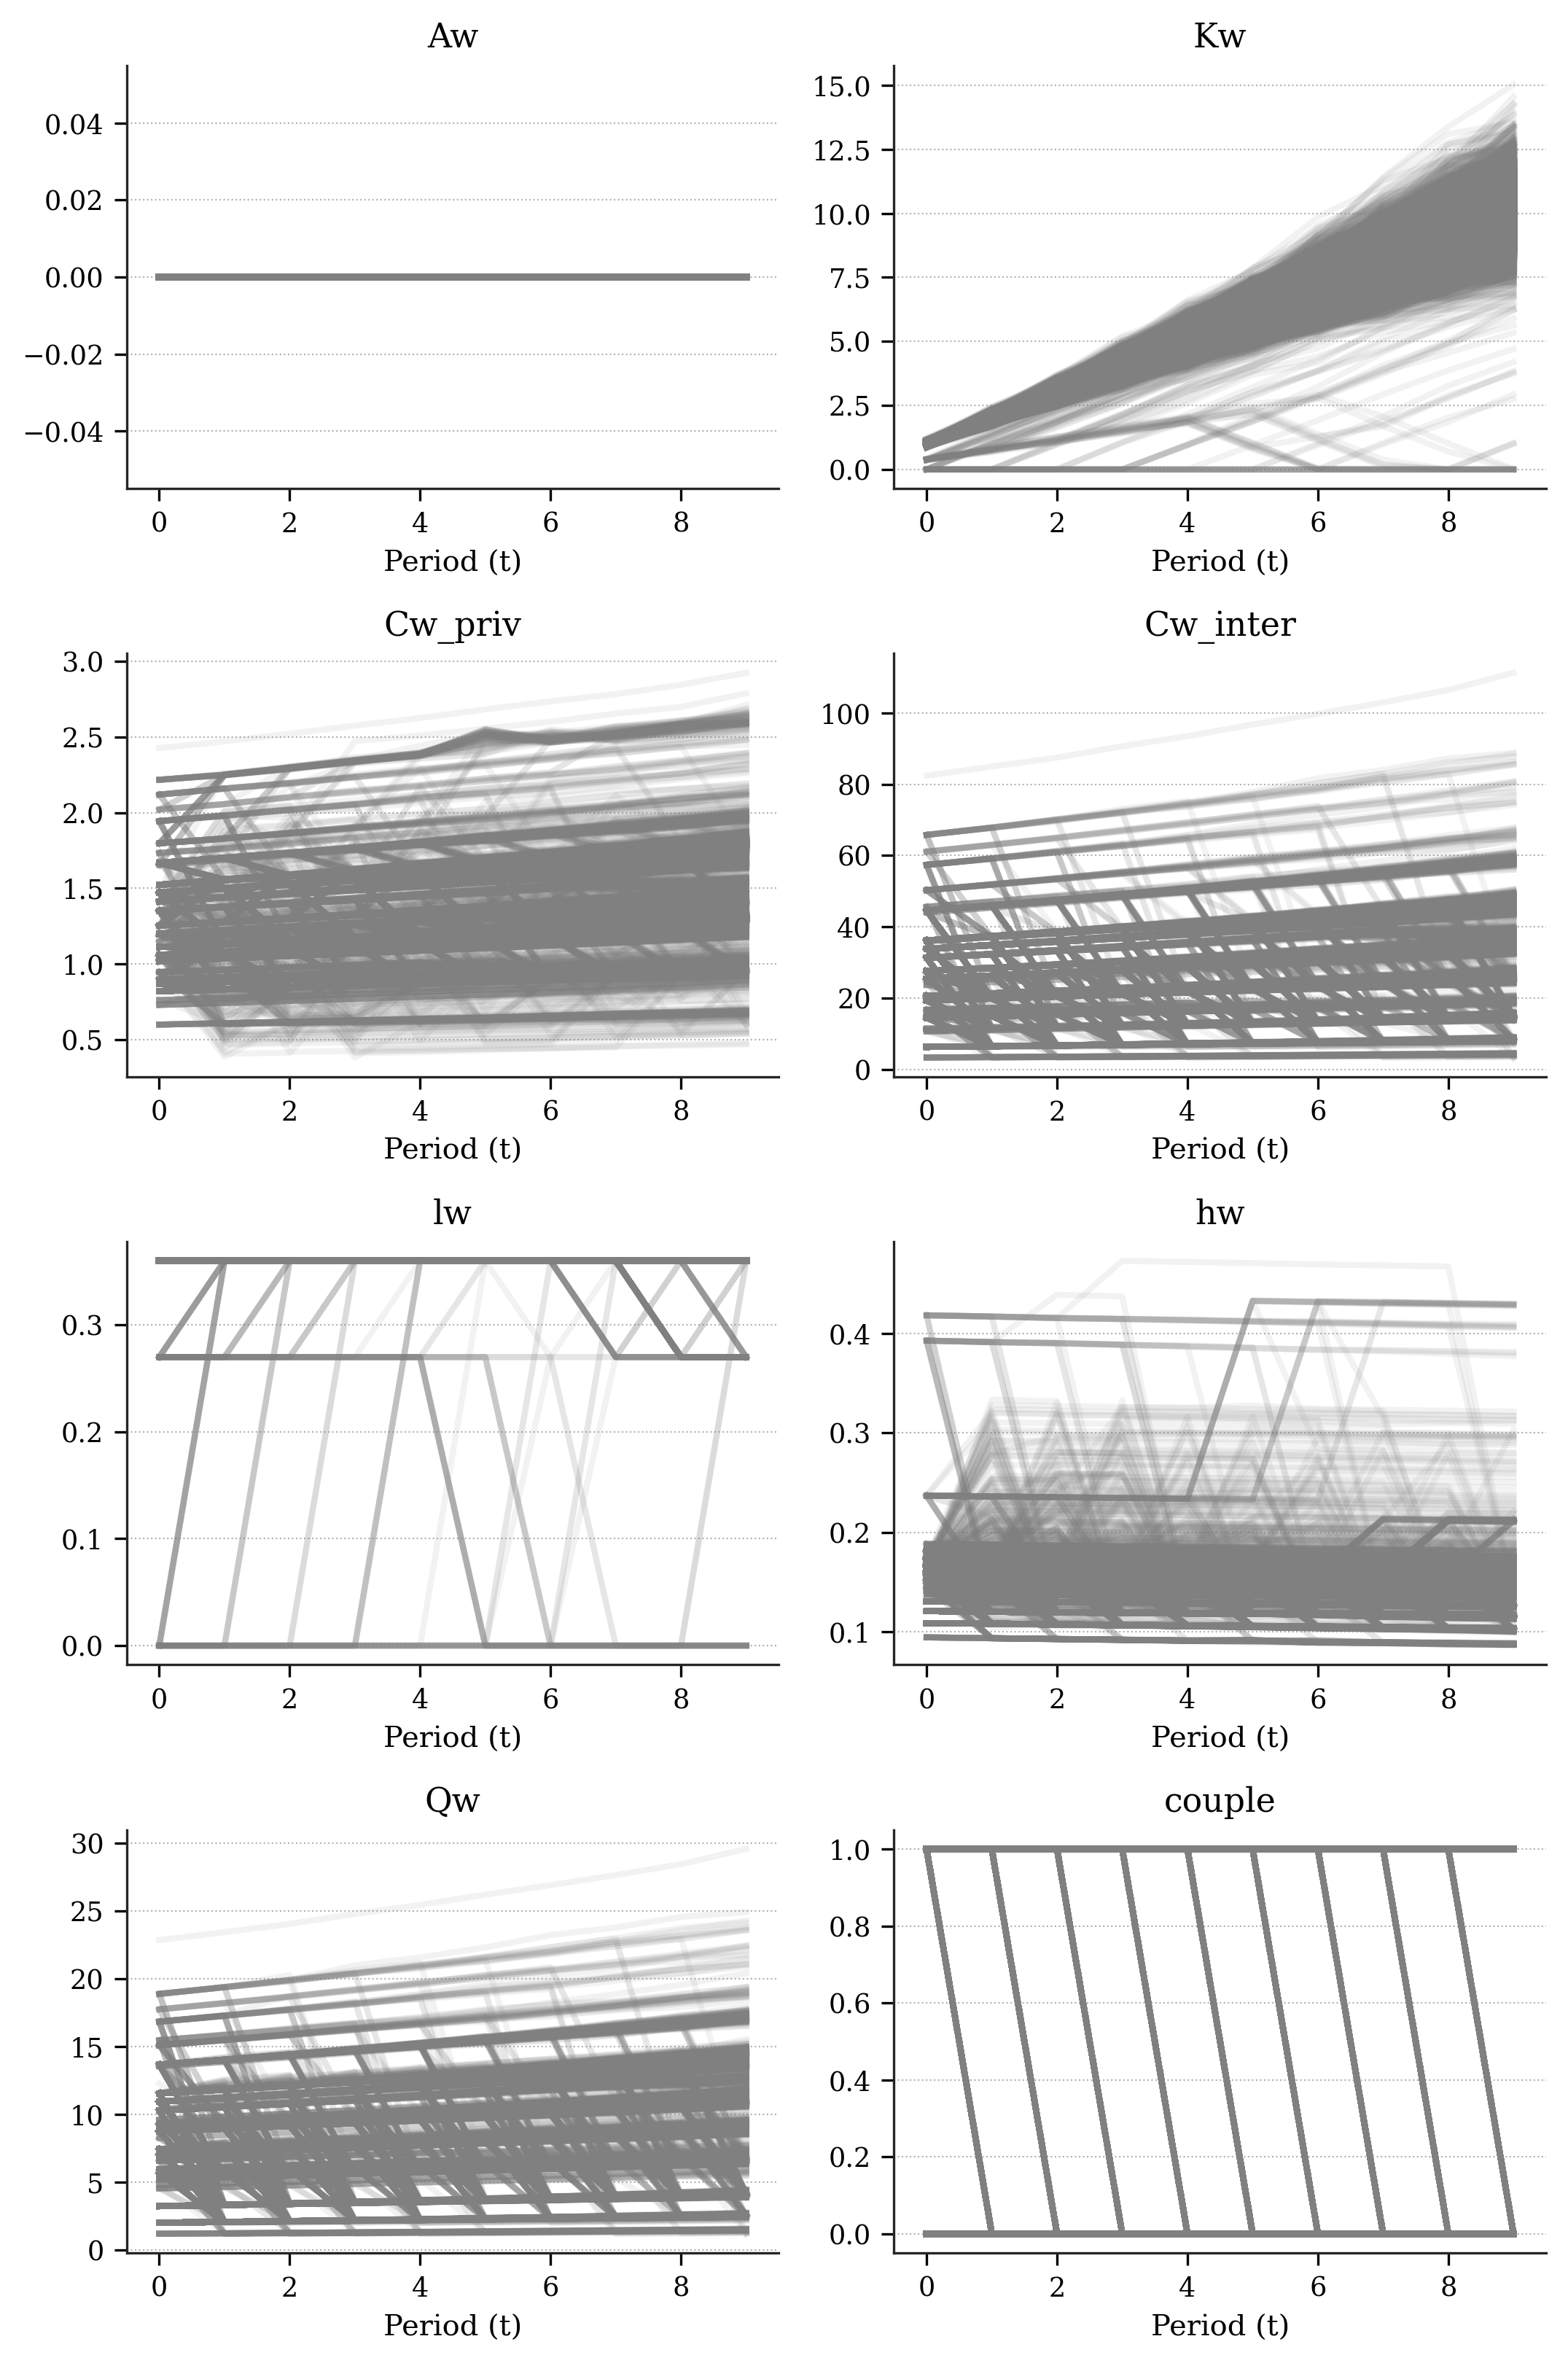

In [22]:
fig, ax = fm.create_figure(4,2,8)
mp_iEGMinv.plot_sim_female(ax, agg_fct=None ,alpha=0.5)
if save_figures: fm.save_figure(filename="sim_test")
else: fig.tight_layout()

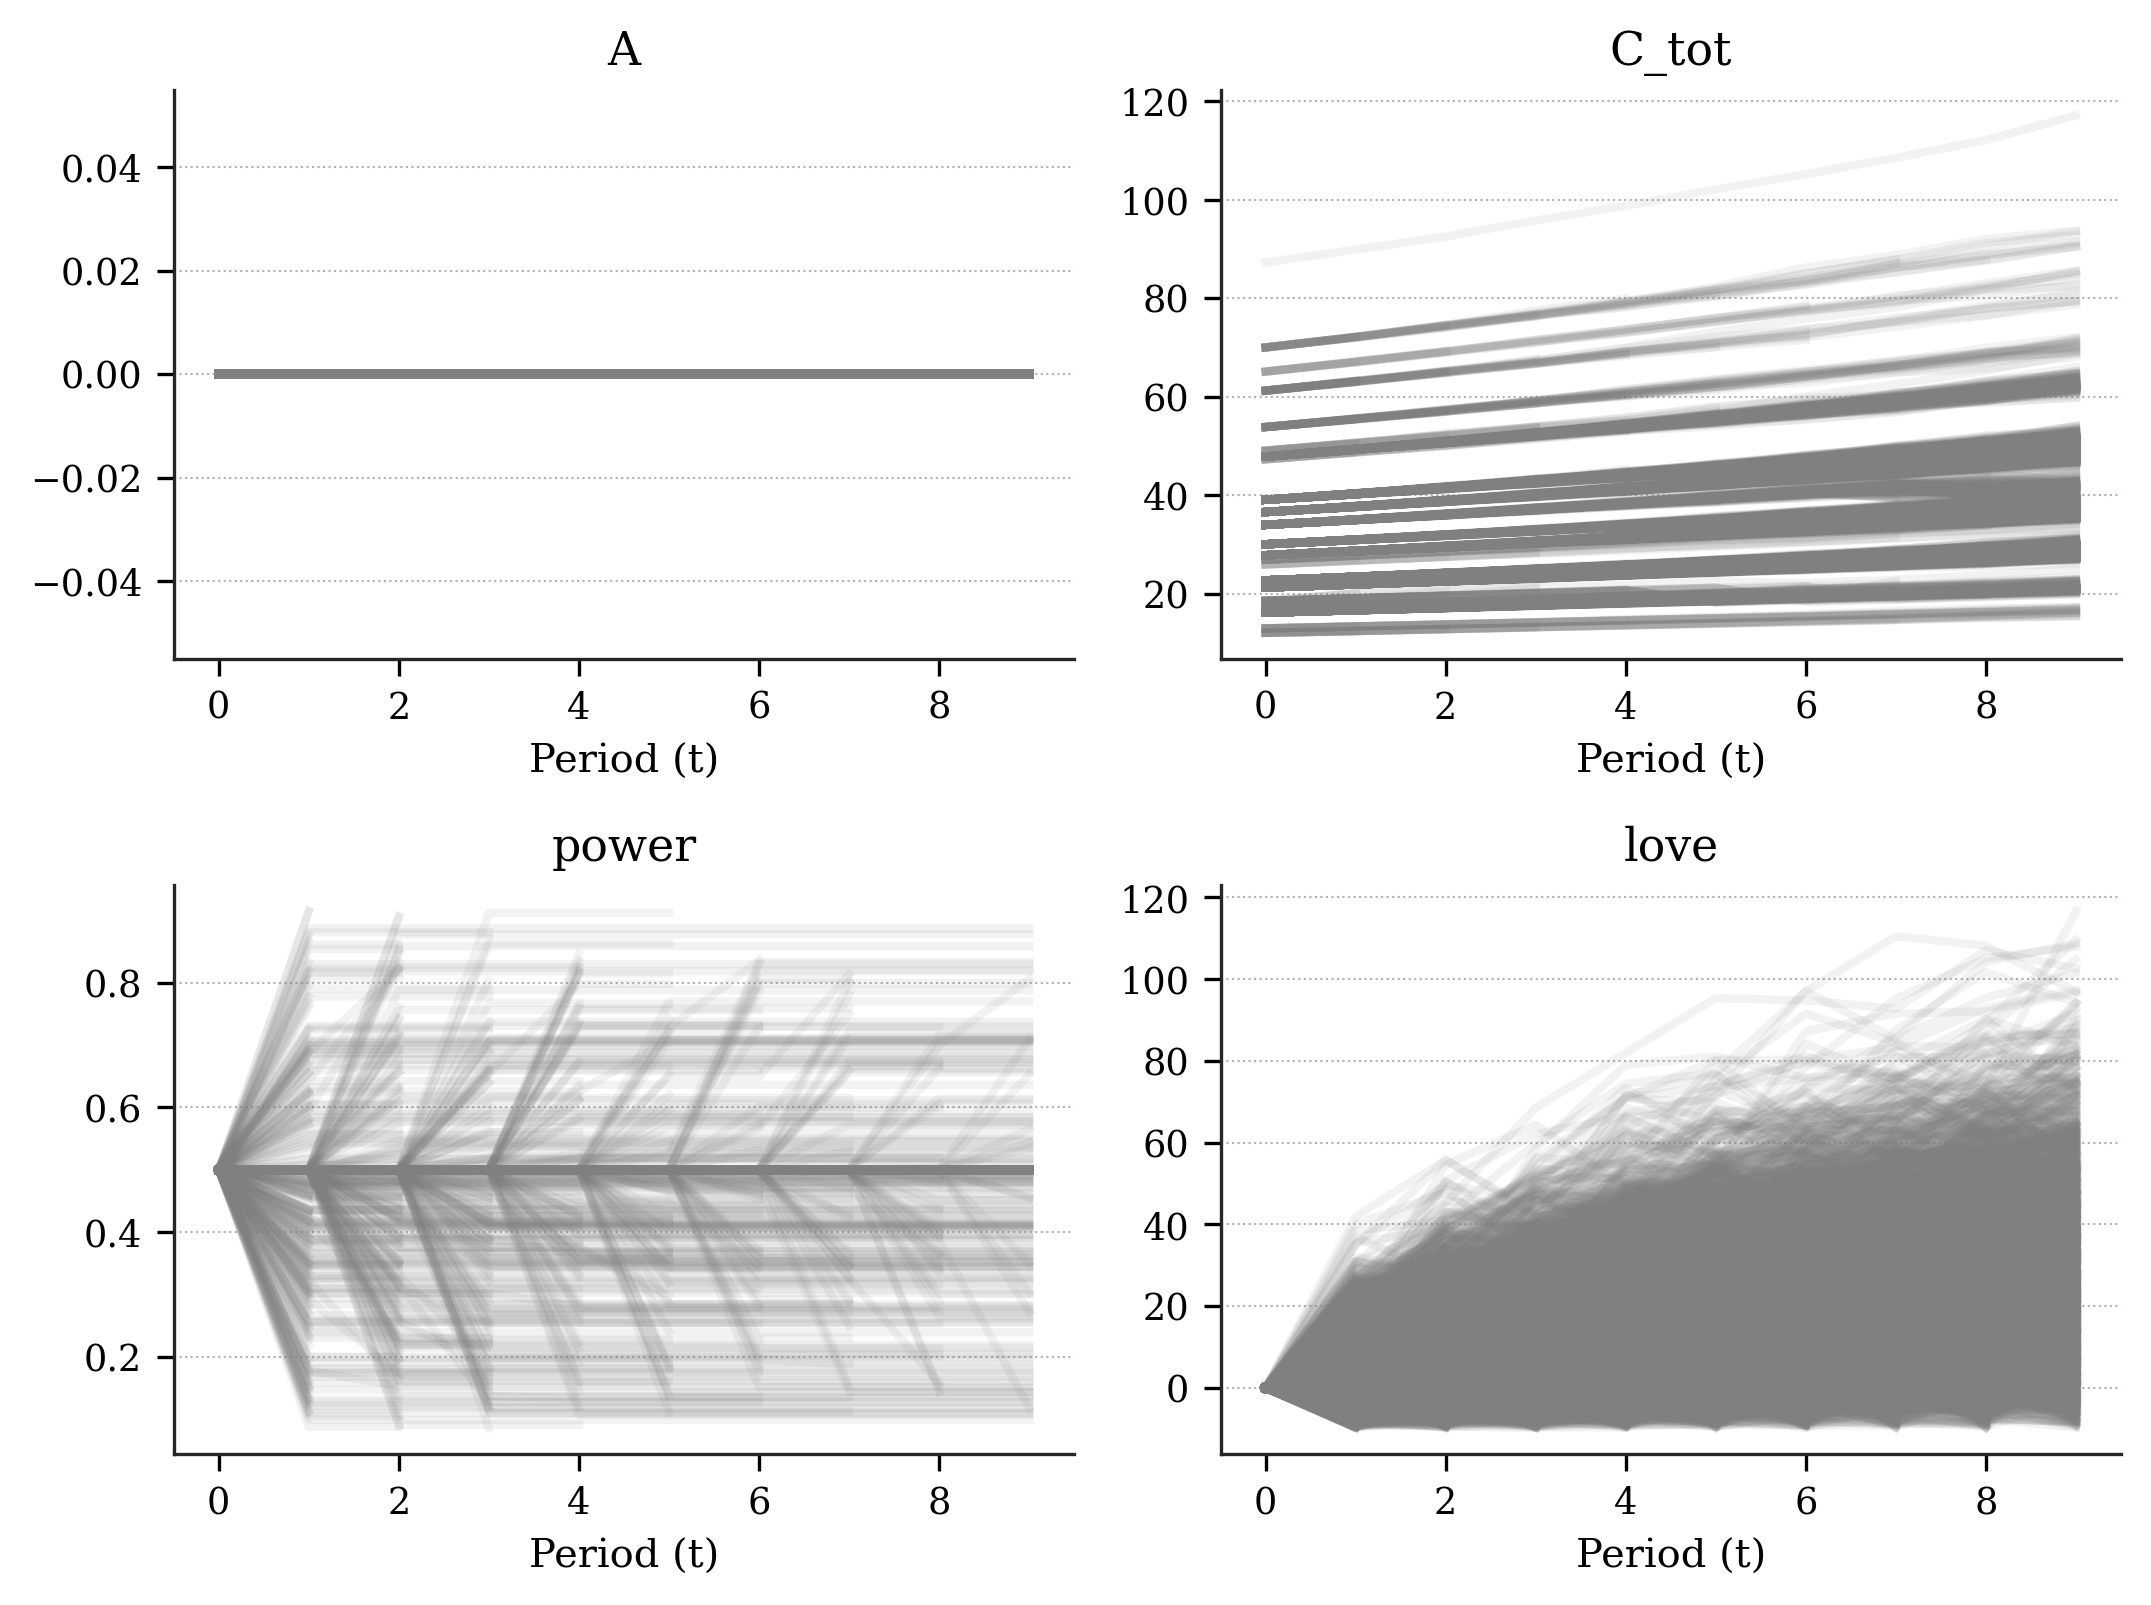

In [23]:
fig, ax = fm.create_figure(2,2,4)
mp_iEGMinv.plot_sim_couple(ax, agg_fct=None ,alpha=0.5)
if save_figures: fm.save_figure(filename="sim_test")
else: fig.tight_layout()

In [24]:
print('w: ',model_iEGMinv.sol.Vw_couple_to_couple[t, :, iL, 0, 4, iK, iK, iA] - model_iEGMinv.sol.Vw_couple_to_single[t, 0, iK, iA])
print('m: ',model_iEGMinv.sol.Vm_couple_to_couple[t, :, iL, 0, 4, iK, iK, iA] - model_iEGMinv.sol.Vm_couple_to_single[t, 4, iK, iA])




w:  [-135.2457627   158.16692374  177.39684903  185.97738842  191.60293034
  195.34561026  197.87142309  191.48747522  199.9247853 ]
m:  [  37.81158686   50.10354786   47.42269555   44.71411852   40.95055222
   35.35237811   27.1302484     9.57548157 -240.87768496]
